# Import and function definitions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
from statannot import add_stat_annotation
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
#rc('text', usetex=False)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

file = '/Users/travis/Google Drive/NIRCAT Spatial Analysis Project/Data Analysis By Region.xlsx'

rawdata = pd.read_excel(file, 'Current Analysis',
                        header=1, index_col=None, na_values=['NA'])

fulldata = rawdata.filter(['MouseID','X (um)', 'Y (um)', 'Region',
                           'Nucleus', 'Mean', 'Mean.1', 'Mean.2', 'Mean.3'], axis=1)
fulldata.rename({'Mean': 'Amplitude', 'Mean.1': 'AUC', 'Mean.2': 'NumROIs',
                 'Mean.3': 'Tau', 'X (um)': 'x', 'Y (um)': 'y'}, axis='columns', inplace=True)
fulldata = fulldata.dropna()
fulldata = fulldata[fulldata.MouseID!=4]

# Define function for plotting ampltiude and tau for two different data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
import seaborn as sns
from statannot import add_stat_annotation

def plot_amp_tau_hist(data1, data2, labels):
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.hist(data1['Amplitude'], bins=np.arange(0, .3 + .01, .01), density=True,
             histtype='step', label=labels[0])
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Count')

    ax2.hist(data1['Tau'], bins=np.arange(0, 10 + .25, .25), density=True,
             histtype='step', label=labels[0])
    ax2.set_xlabel('Tau (s)')
    ax2.set_ylabel('Count')

    ax1.hist(data2['Amplitude'], bins=np.arange(0, .3 + .01, .01), density=True,
             histtype='step', label=labels[1])
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Count')

    ax2.hist(data2['Tau'], bins=np.arange(0, 10 + .25, .25), density=True,
             histtype='step', label=labels[1])
    ax2.set_xlabel('Tau (s)')
    ax2.set_ylabel('Count')
    ax1.set_xlim([0, 0.3])

    ax1.legend()
    ax2.legend()

    ax2.set_xlim([0, 10])
    plt.tight_layout()
    return ax1, ax2
def plot_int_corr(data1, data2, labels):
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(data1['Mean_Intensity'], data1['Amplitude'],
                alpha=0.3, label=labels[0])
    ax1.set_ylabel('dF/F Amplitude')
    ax1.set_xlabel('Mean ROI Intensity')
    ax1.scatter(data2['Mean_Intensity'], data2['Amplitude'],
                alpha=0.3, label=labels[1])
    ax1.set_ylabel('dF/F Amplitude')
    ax1.set_xlabel('Mean ROI Intensity')

    ax2.scatter(data1['Mean_Intensity'], data1['Tau'],
                alpha=0.3, label=labels[0])
    ax2.set_ylabel('Tau (s)')
    ax2.set_xlabel('Mean ROI Intensity')
    ax2.scatter(data2['Mean_Intensity'], data2['Tau'],
                alpha=0.3, label=labels[1])
    ax2.set_ylabel('Tau (s)')
    ax2.set_xlabel('Mean ROI Intensity')

    ax1.legend()
    ax2.legend()
    return ax1, ax2
def calc_ker_dens(data1, data2, labels):

    from sklearn.neighbors import KernelDensity
    import numpy as np

    plt.rcParams.update({'font.size': 8})
    #plt.rcParams["figure.figsize"] = (2.16, 4.5)  # (w, h)
    plt.rcParams["figure.figsize"] = (2.5, 4.5)  # (w, h)
    fig, (ax1, ax2) = plt.subplots(2,1)

    # Plot amplitude values and calculate KDE
    # data1
    data = data1['Amplitude'].values[:, np.newaxis]
    x_values = np.linspace(-.1, .4, 1000)[:, np.newaxis]
    #ax1.hist(data, density=True, bins=20,
    #         histtype='step', label=labels[0], color='b')
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax1.plot(x_values, np.exp(log_pdf), label=labels[0], c='blue')
    # data2
    data = data2['Amplitude'].values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data)
    log_pdf = kde.score_samples(x_values)
    #ax1.hist(data, density=True, bins=20, histtype='step',
    #         label=labels[1], color='orange')
    ax1.plot(x_values, np.exp(log_pdf), label=labels[1], color='orange')
    ax1.set_xlim([0, .4])
    ax1.set_xlabel('Peak Amplitude')
    ax1.legend()

    # Plot tau values and calculate KDE
    # data1
    data = data1['Tau'].values[:, np.newaxis]
    x_values = np.linspace(-.1, 10, 1000)[:, np.newaxis]
    #ax2.hist(data, density=True, bins=20, histtype='step',
    #         label=labels[0], color='blue')
    kde = KernelDensity(kernel='gaussian', bandwidth=.5).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax2.plot(x_values, np.exp(log_pdf), label=labels[0], color='blue')
    # data2
    data = data2['Tau'].values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=.5).fit(data)
    log_pdf = kde.score_samples(x_values)
    #ax2.hist(data, density=True, bins=20, histtype='step',
    #         label=labels[1], color='orange')
    ax2.plot(x_values, np.exp(log_pdf), label=labels[1], color='orange')
    ax2.set_xlim([0, 10])
    ax2.set_xlabel('Decay Constant (s)')
    ax2.legend()

    #plt.tight_layout()
    return ax1, ax2
def plot_kde2d_amp_tau(data1, data2, labels):
    # Calculate 2D KDE for data1
    max_amp = max(data1['Amplitude'].values)
    max_tau = max(data1['Tau'].values)
    # Normalize data for KDE
    data = np.vstack([data1['Amplitude'].values/max_amp,
                      data1['Tau'].values/max_tau])
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data.T)
    Z_1 = np.reshape(np.exp(kde.score_samples(positions.T)), xx.shape)

    # Calculate 2D KDE for data2
    # Use same max values as for to keep axes on same scale
    data = np.vstack([data2['Amplitude'].values/max_amp,
                      data2['Tau'].values/max_tau])
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data.T)
    Z_2 = np.reshape(np.exp(kde.score_samples(positions.T)), xx.shape)

    plt.rcParams.update({'font.size': 8})
    plt.rcParams["figure.figsize"] = (2.24, 4.5)  # (w, h)
    #plt.rcParams["figure.figsize"] = (4.5, 2.25)  # (w, h)
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.scatter(data1['Amplitude'], data1['Tau'], alpha=0.3, label=labels[0],s=1)
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Tau (s)')
    ax1.scatter(data2['Amplitude'], data2['Tau'], alpha=0.3, label=labels[1],s=1)
    ax1.set_xlim([0, 0.2])
    ax1.set_ylim([0,6])
    ax1.legend()
    '''
    fig, (ax2,ax3) = plt.subplots(2,1)
    ax2.contourf(xx, yy, Z_1, cmap='magma')
    ax2.set_ylim([0, 0.6])
    ax2.set_xlim([0, 0.6])
    #ax2.set_title(labels[0])
    ax2.set_xlabel('Normalized Amplitude')
    ax2.set_ylabel('Normalized Tau')
    ax3.contourf(xx, yy, Z_2, cmap='magma')
    ax3.set_ylim([0, 0.6])
    ax3.set_xlim([0, 0.6])
    #ax3.set_title(labels[1])
    ax3.set_xlabel('Normalized Amplitude')
    plt.tight_layout()
    return ax1, ax2, ax3
def export_plot_pdf(filename):
    plt.rcParams.update({'font.size': 8})
    #mpl.rcParams['font.sans-serif'] = "Arial"
    mpl.rcParams['font.family'] = "sans-serif"
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    #plt.spines['right'].set_visible(False)
    #plt.spines['top'].set_visible(False)
    plt.savefig(filename,transparent=True,bbox_inches="tight")

In [180]:
np.arange(0,10,.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

# Plots of averaged data

## Averaged values plotted against position

<Figure size 1008x216 with 0 Axes>

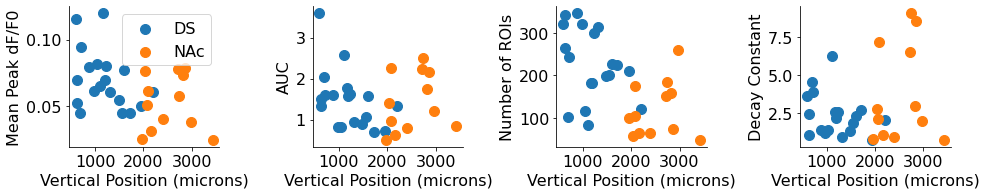

In [2]:
plt.rcParams["figure.figsize"] = (14, 3) # (w, h)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
data = fulldata[fulldata['Nucleus']=='DS']
fig, ax = plt.subplots(1,4)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(data['y'],data['Amplitude'],s=100,label='DS')
ax1.set_ylabel('Mean Peak dF/F0')
ax1.set_xlabel('Vertical Position (microns)')
ax2.scatter(data['y'],data['AUC'],s=100)
ax2.set_ylabel('AUC')
ax2.set_xlabel('Vertical Position (microns)')
ax3.scatter(data['y'],data['NumROIs'],s=100)
ax3.set_ylabel('Number of ROIs')
ax3.set_xlabel('Vertical Position (microns)')
ax4.scatter(data['y'],data['Tau'],s=100)
ax4.set_ylabel('Decay Constant')
ax4.set_xlabel('Vertical Position (microns)')

data = fulldata[fulldata['Nucleus']=='Nac']

ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(data['y'],data['Amplitude'],s=100,label='NAc')
ax1.set_ylabel('Mean Peak dF/F0')
ax1.set_xlabel('Vertical Position (microns)')
ax2.scatter(data['y'],data['AUC'],s=100)
ax2.set_ylabel('AUC')
ax2.set_xlabel('Vertical Position (microns)')
ax3.scatter(data['y'],data['NumROIs'],s=100)
ax3.set_ylabel('Number of ROIs')
ax3.set_xlabel('Vertical Position (microns)')
ax4.scatter(data['y'],data['Tau'],s=100)
ax4.set_ylabel('Decay Constant')
ax4.set_xlabel('Vertical Position (microns)')
plt.tight_layout()
ax1.legend()

<Figure size 1008x216 with 0 Axes>

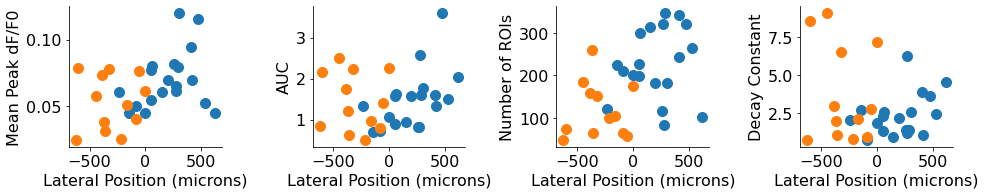

In [3]:
plt.rcParams["figure.figsize"] = (14, 3) # (w, h)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
fig, ax = plt.subplots(1,4)

data = fulldata[fulldata['Nucleus']=='DS']

ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(data['x'],data['Amplitude'],s=100)
ax1.set_ylabel('Mean Peak dF/F0')
ax1.set_xlabel('Lateral Position (microns)')
ax2.scatter(data['x'],data['AUC'],s=100)
ax2.set_ylabel('AUC')
ax2.set_xlabel('Lateral Position (microns)')
ax3.scatter(data['x'],data['NumROIs'],s=100)
ax3.set_ylabel('Number of ROIs')
ax3.set_xlabel('Lateral Position (microns)')
ax4.scatter(data['x'],data['Tau'],s=100)
ax4.set_ylabel('Decay Constant')
ax4.set_xlabel('Lateral Position (microns)')

data = fulldata[fulldata['Nucleus']=='Nac']

ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(data['x'],data['Amplitude'],s=100)
ax1.set_ylabel('Mean Peak dF/F0')
ax1.set_xlabel('Lateral Position (microns)')
ax2.scatter(data['x'],data['AUC'],s=100)
ax2.set_ylabel('AUC')
ax2.set_xlabel('Lateral Position (microns)')
ax3.scatter(data['x'],data['NumROIs'],s=100)
ax3.set_ylabel('Number of ROIs')
ax3.set_xlabel('Lateral Position (microns)')
ax4.scatter(data['x'],data['Tau'],s=100)
ax4.set_ylabel('Decay Constant')
ax4.set_xlabel('Lateral Position (microns)')
plt.tight_layout()

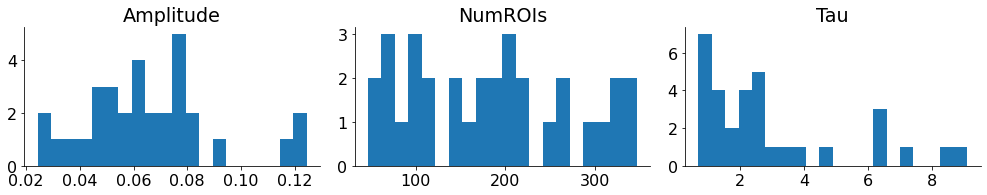

In [4]:
plt.rcParams["figure.figsize"] = (14, 3) # (w, h)
plt.rcParams.update({'font.size': 16})
fulldata.hist(column=['Amplitude', 'NumROIs','Tau'],grid=False, bins=20,layout=[1,3])
plt.tight_layout()

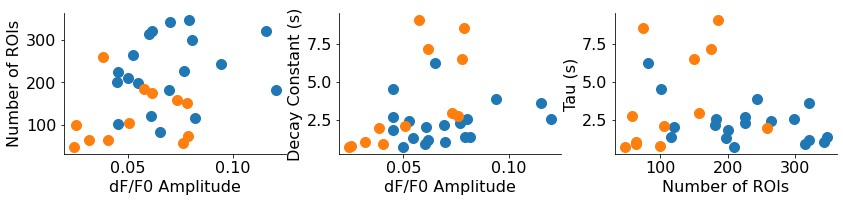

In [5]:
#Plot peak dF/F vs number of ROIs and peak dF/F vs tau
plt.rcParams["figure.figsize"] = (12, 3) # (w, h)
plt.rcParams.update({'font.size': 16})

data_ds = fulldata[fulldata['Nucleus']=='DS']
data_nac = fulldata[fulldata['Nucleus']=='Nac']
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.scatter(data_ds['Amplitude'],data_ds['NumROIs'],s=100)
ax1.scatter(data_nac['Amplitude'],data_nac['NumROIs'],s=100)
ax1.set_xlabel('dF/F0 Amplitude')
ax1.set_ylabel('Number of ROIs')
ax2.scatter(data_ds['Amplitude'],data_ds['Tau'],s=100)
ax2.scatter(data_nac['Amplitude'],data_nac['Tau'],s=100)
ax2.set_xlabel('dF/F0 Amplitude')
ax2.set_ylabel('Decay Constant (s)')
ax3.scatter(data_ds['NumROIs'],data_ds['Tau'], s=100)
ax3.scatter(data_nac['NumROIs'],data_nac['Tau'], s=100)
ax3.set_xlabel('Number of ROIs')
ax3.set_ylabel('Tau (s)')
plt.tight_layout()

In [232]:
data.corr()

,x,y,Amplitude,AUC,NumROIs,Tau
x,1.000000,-0.813444,0.080659,-0.123428,0.023374,-0.171612
y,-0.813444,1.000000,-0.010626,0.230354,0.192672,0.135588
Amplitude,0.080659,-0.010626,1.000000,0.788145,0.149994,0.689012
AUC,-0.123428,0.230354,0.788145,1.000000,0.464024,0.946258
NumROIs,0.023374,0.192672,0.149994,0.464024,1.000000,0.350354
Tau,-0.171612,0.135588,0.689012,0.946258,0.350354,1.000000


## Regional analysis of averaged measurements: dStr v NAcc

MannwhitneyuResult(statistic=10.0, pvalue=0.0015309849674425109)


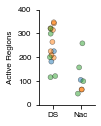

In [212]:
plt.rcParams["figure.figsize"] = (1, 1.75) # (w, h)
plt.rcParams.update({'font.size': 8})

param = 'NumROIs'
data1=fulldata[fulldata['Nucleus']=='DS']
data2=fulldata[fulldata['Nucleus']=='Nac']
results = stats.mannwhitneyu(data1[param].values,data2[param].values)
print(results)
ax = sns.stripplot(x='Nucleus',y=param,data=fulldata,s=5,alpha=0.5,hue="MouseID",linewidth=0.5,edgecolor='k')
#add_stat_annotation(ax, data=fulldata, x='Nucleus', y=param, 
                                   #box_pairs=[("DS", "Nac")],
                                   #test='Mann-Whitney', text_format='simple',
                                   #loc='outside', verbose=2)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
ax.set(ylabel='Active Regions',xlabel='')
ax.set_ylim([0,400])
plt.savefig('numrois_catplot.pdf',transparent=True,bbox_inches="tight")

In [34]:
markers

['o', 'x', '^']

MannwhitneyuResult(statistic=13.0, pvalue=0.0029876041670031193)


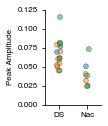

In [213]:
plt.rcParams["figure.figsize"] = (1, 1.75) # (w, h)
plt.rcParams.update({'font.size': 8})
param = 'Amplitude'
data1=fulldata[fulldata['Nucleus']=='DS']
data2=fulldata[fulldata['Nucleus']=='Nac']

results = stats.mannwhitneyu(data1[param].values,data2[param].values)
print(results)
ax = sns.stripplot(x='Nucleus',y=param,data=fulldata,s=5,alpha=0.5,hue='MouseID',linewidth=0.5,edgecolor='k')
#add_stat_annotation(ax, data=fulldata, x='Nucleus', y=param, 
                                   #box_pairs=[("DS", "Nac")],
                                   #test='Mann-Whitney', text_format='simple',
                                   #loc='outside', verbose=2)
#plt.rcParams.update({'font.size': 22})
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
ax.set(ylabel='Peak Amplitude',xlabel='')
ax.set_ylim([0,.125])
plt.savefig('amplitude_catplot.pdf',transparent=True,bbox_inches="tight")

MW results: [0.27014569 0.02509309 0.03309629 0.        ]


/Users/travis/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:7039: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


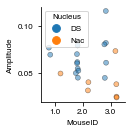

In [261]:
plt.rcParams["figure.figsize"] = (1.5, 1.75) # (w, h)
plt.rcParams.update({'font.size': 8})
param = 'Amplitude'
data1=fulldata[fulldata['Nucleus']=='DS']
data2=fulldata[fulldata['Nucleus']=='Nac']

#results = stats.ttest_ind(data1[param].values,data2[param].values)
#print(results)
ax = sns.stripplot(x='MouseID',y=param,data=fulldata,s=5,alpha=0.5,hue='Nucleus',dodge=True,linewidth=0.5,edgecolor='k')
plt.rcParams.update({'font.size': 22})

# Mann-Whitney comparison
mw_results = np.zeros(4)
for i in [1,2,3,4]:
    data = fulldata[fulldata['MouseID']==i]
    data1=data[data['Nucleus']=='DS']['Amplitude'].values
    data2=data[data['Nucleus']=='Nac']['Amplitude'].values
    results = stats.mannwhitneyu(data1,data2)
    mw_results[i-1] = results.pvalue
print('MW results: ' + str(mw_results))

In [263]:
fulldata['MouseID'].unique()

array([1., 2., 3.])

pvalue=2.3827475793755933e-07


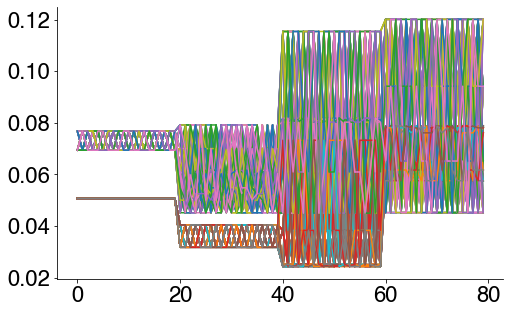

In [381]:
# Resample data to calculate Wilcoxon between animals
pvalues = []
j=1
while j<100:
    resampled_data=np.zeros((0,2))
    for i in [1,2,3,4]:
        data = fulldata[fulldata['MouseID']==i]
        data1=data[data['Nucleus']=='DS']['Amplitude'].values
        data2=data[data['Nucleus']=='Nac']['Amplitude'].values
        k = 20
        DS = random.choices(data1.tolist(),k=k)
        NAc = random.choices(data2.tolist(),k=k)
        pairs = np.vstack((DS,NAc))

        resampled_data = np.vstack([resampled_data,pairs.T])
    results = stats.wilcoxon(resampled_data[:,0],resampled_data[:,1])
    plt.plot(resampled_data)
    pvalues.append(results.pvalue)
    j+=1
print('pvalue='+(str(np.mean(pvalues))))

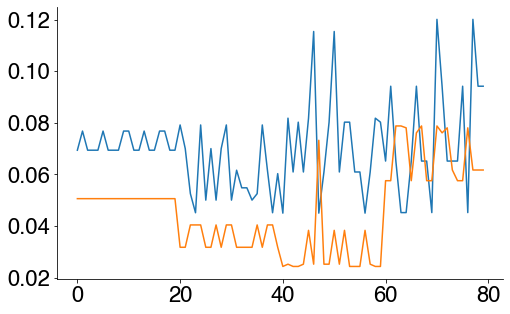

In [382]:
plt.plot(resampled_data)

(array([29., 16., 19., 14.,  8.,  4.,  3.,  1.,  3.,  3.]),
 array([0.00244141, 0.04458008, 0.08671875, 0.12885742, 0.17099609,
        0.21313477, 0.25527344, 0.29741211, 0.33955078, 0.38168945,
        0.42382812]),
 <a list of 10 Patch objects>)

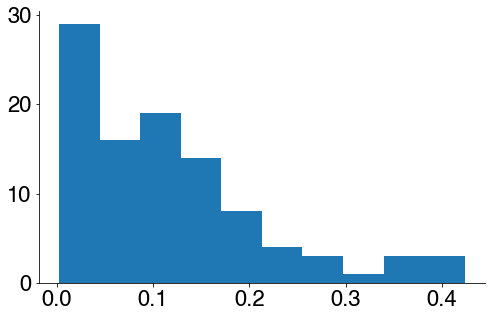

In [383]:
# Resample data to calculate Wilcoxon signed rank
import random
data1=fulldata[fulldata['Nucleus']=='DS']['Amplitude'].values
data2=fulldata[fulldata['Nucleus']=='Nac']['Amplitude'].values
k = min([len(data1),len(data2)])

i=0
result= np.zeros([100,2])
x = np.ones(100)
while i<100:
    DS = random.sample(data1.tolist(),k=k)
    NAc = random.sample(data2.tolist(),k=k)
    results = stats.wilcoxon(DS,NAc,mode='exact')
    result[i,0]=results.statistic
    result[i,1]=results.pvalue
    i+=1
plt.hist(result[:,1])

In [124]:
results

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

(array([10., 14., 20., 21.,  7., 11., 12.,  2.,  1.,  2.]),
 array([0.00430778, 0.02091593, 0.03752408, 0.05413224, 0.07074039,
        0.08734854, 0.1039567 , 0.12056485, 0.137173  , 0.15378115,
        0.17038931]),
 <a list of 10 Patch objects>)

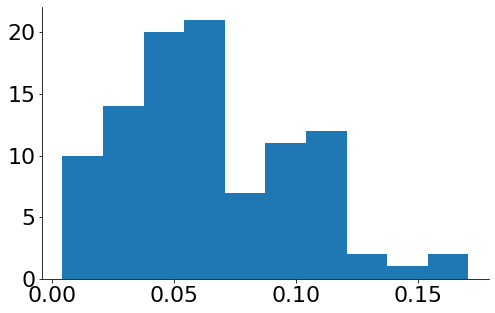

In [144]:
# Resample data to calculate Mann-Whitney
import random
data1=fulldata[fulldata['Nucleus']=='DS']['Amplitude'].values
data2=fulldata[fulldata['Nucleus']=='Nac']['Amplitude'].values
k = min([len(data1),len(data2)])

i=0
result= np.zeros([100,2])
x = np.ones(100)
while i<100:
    DS = random.sample(data1.tolist(),k=k)
    NAc = random.sample(data2.tolist(),k=k)
    results = stats.mannwhitneyu(DS,NAc)
    result[i,0]=results.statistic
    result[i,1]=results.pvalue
    i+=1
#plt.hist(result[:,0])
plt.hist(result[:,1])

MannwhitneyuResult(statistic=159.0, pvalue=0.03555977796122501)

In [ ]:
# MixedLM calculation
import statsmodels.api as sm
import statsmodels.formula.api as smf


MannwhitneyuResult(statistic=35.0, pvalue=0.11539184585723644)


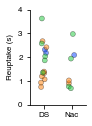

In [215]:
plt.rcParams["figure.figsize"] = (1, 1.75) # (w, h)
plt.rcParams.update({'font.size': 8})
param = 'Tau'
data1=fulldata[fulldata['Nucleus']=='DS']
data2=fulldata[fulldata['Nucleus']=='Nac']
results = stats.mannwhitneyu(data1[param].values,data2[param].values)
print(results)
ax = sns.stripplot(x='Nucleus',y=param,data=fulldata,s=5,hue='MouseID',
                                   palette='bright', alpha=0.5,linewidth=0.5,edgecolor='k')
#add_stat_annotation(ax, data=fulldata, x='Nucleus', y=param, 
                                   #box_pairs=[("DS", "Nac")],
                                   #test='Mann-Whitney', text_format='simple',
                                   #loc='outside', verbose=2)
plt.ylabel('Tau (s)')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(ylabel='Reuptake (s)',xlabel='')
ax.get_legend().remove()
ax.set_ylim([0,4])
plt.savefig('tau_catplot.pdf',transparent=True,bbox_inches="tight")

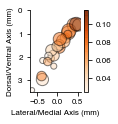

In [220]:
plt.rcParams["figure.figsize"] = (1.15, 1.5) # (w, h)
plt.rcParams.update({'font.size': 8})
x=fulldata['x'].values/1000
y=fulldata['y'].values/1000
amplitude=fulldata['Amplitude'].values
num_rois = fulldata['NumROIs'].values*2e2/fulldata['NumROIs'].max()
#fulldata.plot.scatter(x='x'/1000,y='y'/1000,c='Amplitude',\
#                      s=1e2*fulldata['NumROIs']/fulldata['NumROIs'].max(),colormap='plasma',\
#                     sharex=False,alpha=.5,edgecolor='k')
plt.scatter(x,y,c=amplitude,\
                        s=num_rois,cmap='Oranges',\
                        alpha=.5,edgecolor='k')
plt.xlabel('Lateral/Medial Axis (mm)')
plt.ylabel('Dorsal/Ventral Axis (mm)')
plt.ylim([0,3.5])
plt.gca().invert_yaxis()
plt.colorbar()
#plt.tight_layout()

#plt.title('Number of ROIs per FOV')

#export_plot_pdf('amplitude_map.pdf')
plt.savefig('amplitude_map.pdf',transparent=True,bbox_inches="tight")

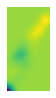

In [38]:
# Convert to grid, apply Gaussian blur, create image, like in de Jong / Lammel work
# grid should go from -.75 to .75 in x and 0,4 in Y

# Renorm position space
x_image = x-np.min(x)
x_image = x_image/np.max(x_image)
y_image = y/max(y)

#Create grid
image = np.zeros([40,20])+np.mean(amplitude)
for i in np.arange(0,len(amplitude),1):
    xx = int(x_image[i]*19)
    yy = int(y_image[i]*39)
    image[yy,xx] = amplitude[i]
from skimage.filters import gaussian
plt.rcParams.update({'font.size': 16})
# plt.rcParams["figure.figsize"] = (2.16, 4.5)  # (w, h)
plt.rcParams["figure.figsize"] = (1.25, 1.55)  # (w, h)
plt.imshow(image)
blurred = gaussian(image, 2,cval=np.mean(amplitude))
plt.imshow(blurred)
plt.axis('off')
plt.savefig('amplitude_map_gaussian.pdf',transparent=True,bbox_inches="tight")

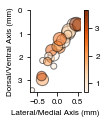

In [221]:
plt.rcParams["figure.figsize"] = (1.15, 1.5) # (w, h)
plt.rcParams.update({'font.size': 8})
x=fulldata['x'].values/1000
y=fulldata['y'].values/1000
tau=fulldata['Tau'].values
num_rois = fulldata['NumROIs'].values*2e2/fulldata['NumROIs'].max()
#fulldata.plot.scatter(x='x'/1000,y='y'/1000,c='Amplitude',\
#                      s=1e2*fulldata['NumROIs']/fulldata['NumROIs'].max(),colormap='plasma',\
#                     sharex=False,alpha=.5,edgecolor='k')
plt.scatter(x,y,c=tau,\
                        s=num_rois,cmap='Oranges',\
                        alpha=.5,edgecolor='k')
plt.xlabel('Lateral/Medial Axis (mm)')
plt.ylabel('Dorsal/Ventral Axis (mm)')
plt.ylim([0,3.5])
plt.gca().invert_yaxis()
#plt.tight_layout()
plt.colorbar()
#plt.title('Number of ROIs per FOV')

#export_plot_pdf('tau_map.pdf')
plt.savefig('tau_map.pdf',transparent=True,bbox_inches="tight")

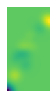

In [39]:
# Convert to grid, apply Gaussian blur, create image, like in de Jong / Lammel work
# grid should go from -.75 to .75 in x and 0,4 in Y

# Renorm position space
x_image = x-np.min(x)
x_image = x_image/np.max(x_image)
y_image = y/max(y)

#Create grid
image = np.zeros([40,20])+np.mean(tau)
for i in np.arange(0,len(amplitude),1):
    xx = int(x_image[i]*19)
    yy = int(y_image[i]*39)
    image[yy,xx] = tau[i]
from skimage.filters import gaussian
plt.rcParams.update({'font.size': 16})
# plt.rcParams["figure.figsize"] = (2.16, 4.5)  # (w, h)
plt.rcParams["figure.figsize"] = (1.25, 1.55)  # (w, h)
plt.imshow(image)
blurred = gaussian(image, 2,cval=np.mean(tau))
plt.imshow(blurred)
plt.axis('off')
plt.savefig('tau_map_gaussian.pdf',transparent=True,bbox_inches="tight")

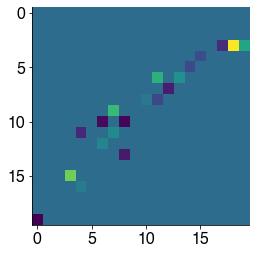

In [127]:
plt.imshow(image)

In [126]:
# Depricated function defs
# Define function for plotting ampltiude and tau for two different data sets
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
import seaborn as sns
from statannot import add_stat_annotation


def plot_amp_tau_hist(data1, data2, labels):
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.hist(data1['Amplitude'], bins=20, density=True,
             histtype='step', label=labels[0])
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Count')

    ax2.hist(data1['Tau'], bins=20, density=True,
             histtype='step', label=labels[0])
    ax2.set_xlabel('Tau (s)')
    ax2.set_ylabel('Count')

    ax1.hist(data2['Amplitude'], bins=20, density=True,
             histtype='step', label=labels[1])
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Count')

    ax2.hist(roi_data_nac['Tau'], bins=20, density=True,
             histtype='step', label=labels[1])
    ax2.set_xlabel('Tau (s)')
    ax2.set_ylabel('Count')
    ax1.set_xlim([0, 0.5])

    ax1.legend()
    ax2.legend()

    ax2.set_xlim([0, 10])
    plt.tight_layout()
    return ax1, ax2


def plot_int_corr(data1, data2, labels):
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(data1['Mean_Intensity'], data1['Amplitude'],
                alpha=0.3, label=labels[0])
    ax1.set_ylabel('dF/F Amplitude')
    ax1.set_xlabel('Mean ROI Intensity')
    ax1.scatter(data2['Mean_Intensity'], data2['Amplitude'],
                alpha=0.3, label=labels[1])
    ax1.set_ylabel('dF/F Amplitude')
    ax1.set_xlabel('Mean ROI Intensity')

    ax2.scatter(data1['Mean_Intensity'], data1['Tau'],
                alpha=0.3, label=labels[0])
    ax2.set_ylabel('Tau (s)')
    ax2.set_xlabel('Mean ROI Intensity')
    ax2.scatter(data2['Mean_Intensity'], data2['Tau'],
                alpha=0.3, label=labels[1])
    ax2.set_ylabel('Tau (s)')
    ax2.set_xlabel('Mean ROI Intensity')

    ax1.legend()
    ax2.legend()
    return ax1, ax2


def calc_ker_dens(data1, data2, labels):

    from sklearn.neighbors import KernelDensity
    import numpy as np

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Plot amplitude values and calculate KDE
    # data1
    data = data1['Amplitude'].values[:, np.newaxis]
    x_values = np.linspace(-.1, .4, 1000)[:, np.newaxis]
    ax1.hist(data, density=True, bins=20,
             histtype='step', label=labels[0], color='b')
    kde = KernelDensity(kernel='gaussian', bandwidth=.01).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax1.plot(x_values, np.exp(log_pdf), label=labels[0], c='blue')
    # data2
    data = data2['Amplitude'].values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=.01).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax1.hist(data, density=True, bins=20, histtype='step',
             label=labels[1], color='orange')
    ax1.plot(x_values, np.exp(log_pdf), label=labels[1], color='orange')
    ax1.set_xlim([0, .4])
    ax1.set_xlabel('dF/F0 Amplitude')
    ax1.legend()

    # Plot tau values and calculate KDE
    # data1
    data = data1['Tau'].values[:, np.newaxis]
    x_values = np.linspace(-.1, 10, 1000)[:, np.newaxis]
    ax2.hist(data, density=True, bins=20, histtype='step',
             label=labels[0], color='blue')
    kde = KernelDensity(kernel='gaussian', bandwidth=.2).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax2.plot(x_values, np.exp(log_pdf), label=labels[0], color='blue')
    # data2
    data = data2['Tau'].values[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=.2).fit(data)
    log_pdf = kde.score_samples(x_values)
    ax2.hist(data, density=True, bins=20, histtype='step',
             label=labels[1], color='orange')
    ax2.plot(x_values, np.exp(log_pdf), label=labels[1], color='orange')
    ax2.set_xlim([0, 10])
    ax2.set_xlabel('Tau (s)')
    ax2.legend()

    plt.tight_layout()
    return ax1, ax2


def plot_kde2d_amp_tau(data1, data2, labels):
    # Calculate 2D KDE for data1
    max_amp = max(data1['Amplitude'].values)
    max_tau = max(data1['Tau'].values)
    # Normalize data for KDE
    data = np.vstack([data1['Amplitude'].values/max_amp,
                      data1['Tau'].values/max_tau])
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data.T)
    Z_1 = np.reshape(np.exp(kde.score_samples(positions.T)), xx.shape)

    # Calculate 2D KDE for data2
    # Use same max values as for to keep axes on same scale
    data = np.vstack([data2['Amplitude'].values/max_amp,
                      data2['Tau'].values/max_tau])
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kde = KernelDensity(kernel='gaussian', bandwidth=.02).fit(data.T)
    Z_2 = np.reshape(np.exp(kde.score_samples(positions.T)), xx.shape)

    plt.rcParams.update({'font.size': 8})
    plt.rcParams["figure.figsize"] = (3.25, 1.25)  # (w, h)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.scatter(data1['Amplitude'], data1['Tau'], alpha=0.3, label=labels[0])
    ax1.set_xlabel('dF/F Amplitude')
    ax1.set_ylabel('Tau (s)')
    ax1.scatter(data2['Amplitude'], data2['Tau'], alpha=0.3, label=labels[1])
    ax1.set_ylim([0, 6])
    ax1.set_xlim([0,.4])
    ax1.legend()
    ax2.contourf(xx, yy, Z_1, cmap='magma')
    ax2.set_ylim([0, 1])
    ax2.set_xlim([0, 1])
    ax2.set_title(labels[0])
    ax2.set_xlabel('Normalized Amplitude')
    ax2.set_ylabel('Normalized Tau')
    ax3.contourf(xx, yy, Z_2, cmap='magma')
    ax3.set_ylim([0, 1])
    ax3.set_xlim([0, 1])
    ax3.set_title(labels[1])
    ax3.set_xlabel('Normalized Amplitude')
    plt.tight_layout()
    return ax1, ax2, ax3
    '''

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy import stats\nfrom sklearn.neighbors import KernelDensity\nimport seaborn as sns\nfrom statannot import add_stat_annotation\n\n\ndef plot_amp_tau_hist(data1, data2, labels):\n    plt.rcParams.update({\'font.size\': 16})\n    plt.rcParams["figure.figsize"] = (10, 5)  # (w, h)\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n\n    ax1.hist(data1[\'Amplitude\'], bins=20, density=True,\n             histtype=\'step\', label=labels[0])\n    ax1.set_xlabel(\'dF/F Amplitude\')\n    ax1.set_ylabel(\'Count\')\n\n    ax2.hist(data1[\'Tau\'], bins=20, density=True,\n             histtype=\'step\', label=labels[0])\n    ax2.set_xlabel(\'Tau (s)\')\n    ax2.set_ylabel(\'Count\')\n\n    ax1.hist(data2[\'Amplitude\'], bins=20, density=True,\n             histtype=\'step\', label=labels[1])\n    ax1.set_xlabel(\'dF/F Amplitude\')\n    ax1.set_ylabel(\'Count\')\n\n    ax2.hist(roi_data_nac[\'Tau\'], bins=20, density=True,

In [ ]:
plt.imshow(image)

# Compare DS to NAc on an ROI by ROI Basis

## Mouse 1 (2019-10-20)

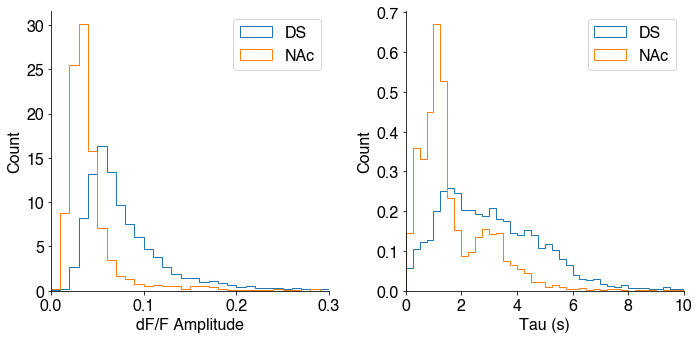

In [218]:
# Plot DS vs NAc
%matplotlib inline
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/WT/2019-10-20/ROI_data-DS.csv'
roi_data = pd.read_csv(roi_data_file, index_col=None, na_values=['NA'])
roi_data_ds = roi_data.dropna()

roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/WT/2019-10-20/ROI_data-NAc.csv'
roi_data = pd.read_csv(roi_data_file, index_col=None, na_values=['NA'])
roi_data_nac = roi_data.dropna()

labels = ['DS', 'NAc']
(ax1, ax2) = plot_amp_tau_hist(roi_data_ds, roi_data_nac, labels)

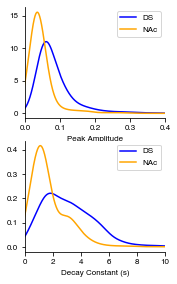

In [219]:
(ax1,ax2) = calc_ker_dens(roi_data_ds,roi_data_nac,labels)

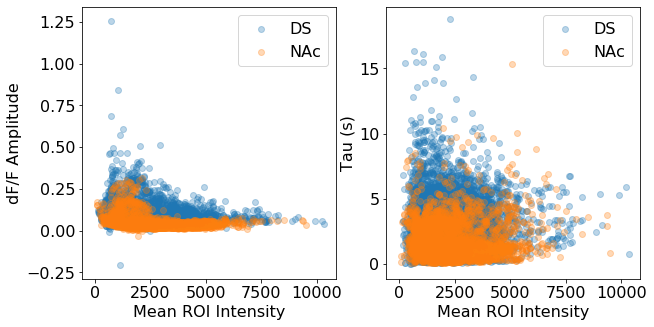

In [6]:
(ax1,ax2) = plot_int_corr(roi_data_ds,roi_data_nac,labels)

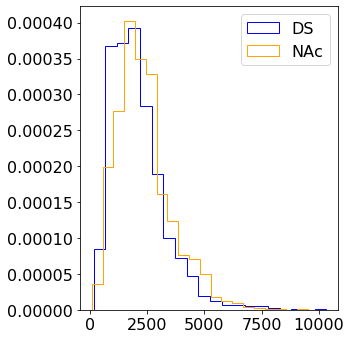

In [18]:
#Plot histogram of Mean ROI intensity in DS vs NAc
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (5, 5) # (w, h)

fig, ax1 = plt.subplots()
ax1.hist(roi_data_ds['Mean_Intensity'],density=True,bins=20,histtype='step',label=labels[0],color='b')
ax1.hist(roi_data_nac['Mean_Intensity'],density=True,bins=20,histtype='step',label=labels[1],color='orange')
labels = ['DS','NAc']
ax1.legend()
plt.tight_layout()
plt.xlabel('Mean ROI Intensity')

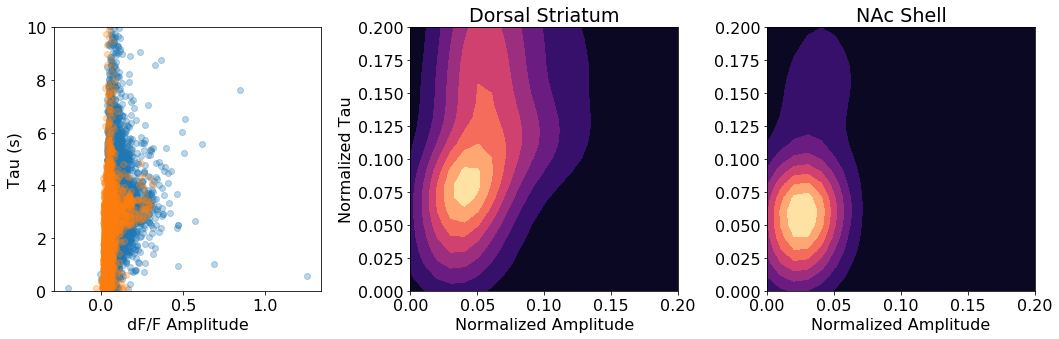

In [126]:
labels=['DS','NAc']
(ax1,ax2,ax3)=plot_kde2d_amp_tau(roi_data_ds,roi_data_nac,labels)
export_plot_pdf('')

## Label "Fast" and "Slow" Rois by partitioning the tau histogram


In [55]:

#Partitioning at tau=2s. Label ROI as "Slow" if tau is below, "Fast" if tau is above thresh

tau_ds = roi_data_ds['Tau']
tau_nac = roi_data_nac['Tau']

#For Dorsal Striatum

#Add new column to dataframe
tau_thresh = np.zeros(np.shape(tau_ds))
tau_thresh[tau_ds>2] = 1
roi_data_ds['tau_thresh']=tau_thresh
roi_data_ds['tau_class'] = roi_data_ds['tau_thresh'].astype('category')
roi_data_ds['tau_class'].cat.categories = ['Fast','Slow']
roi_data_ds = roi_data_ds.drop(columns='tau_thresh')

image_files = roi_data_ds['File Name'].unique()
num_files = image_files.shape


# Combine ROI data for DS and NAc for a single animal and attempt to classify

In [78]:
#Cluster regions of amplitude and tau using normalized data
from sklearn.cluster import KMeans

data = np.vstack([roi_data_ds['Amplitude'].values/max_amp,roi_data_ds['Tau'].values/max_tau])

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
cluster_label = kmeans.fit_predict(data.T)


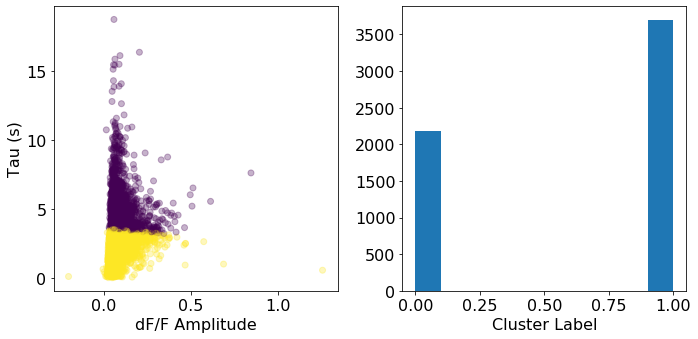

In [79]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10, 5) # (w, h)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(roi_data_ds['Amplitude'],roi_data_ds['Tau'],alpha=0.3,c=cluster_label)
ax1.set_xlabel('dF/F Amplitude')
ax1.set_ylabel('Tau (s)')
ax2.hist(cluster_label)
ax2.set_xlabel('Cluster Label')
plt.tight_layout()

Text(0, 0.5, 'Tau (s)')

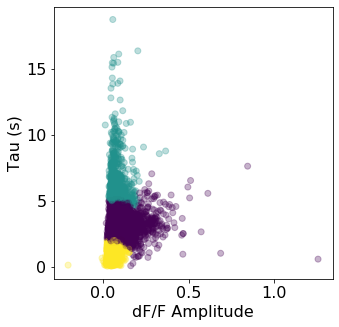

In [86]:
#Agglomerative Clustering of amplitude and tau
from sklearn.cluster import AgglomerativeClustering

data = np.vstack([roi_data_ds['Amplitude'].values/max_amp,roi_data_ds['Tau'].values/max_tau])

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(data.T)

plt.rcParams["figure.figsize"] = (5, 5) # (w, h)
fig, ax1 = plt.subplots()
ax1.scatter(roi_data_ds['Amplitude'],roi_data_ds['Tau'],alpha=0.3,c=clustering.labels_)
ax1.set_xlabel('dF/F Amplitude')
ax1.set_ylabel('Tau (s)')


In [81]:
np.shape(data)

(2, 5883)

In [66]:
file = '10-20-19 Slice 1 Loc 2 Stim 2.xlsx'

image_data = pd.read_excel(file,'image',header=None, index_col=None, na_values=['NA'])
mask = pd.read_excel(file,'mask',header=None, index_col=None, na_values=['NA'])
#fulldata = rawdata.filter(['X (um)','Y (um)','Region','Nucleus','Mean','Mean.1','Mean.2','Mean.3'], axis=1)
#fulldata.rename({'Mean':'Amplitude','Mean.1':'AUC','Mean.2':'NumROIs',\
#             'Mean.3':'Tau','X (um)':'x','Y (um)':'y'}, axis='columns',inplace=True)
#fulldata=fulldata.dropna()



In [69]:
import copy
roi_mask = copy.copy(mask)
df_mask = copy.copy(mask).values.astype(float)
tau_mask = copy.copy(mask).values.astype(float)
mean_mask = copy.copy(mask).values.astype(float)
num_rois = np.amax(mask.values.astype(int))
for i in np.arange(0,num_rois,1):
    if roi_data['Significance'].values[i]:
        df_mask[roi_mask==i+1] = roi_data['Amplitude'][i]
        tau_mask[roi_mask==i+1] = roi_data['Tau'][i]
        mean_mask[roi_mask==i+1] = roi_data['Mean_Intensity'][i]
    else:
        df_mask[roi_mask==i+1] = 0
        tau_mask[roi_mask==i+1] = 0
        mean_mask[roi_mask==i+1] = roi_data['Mean_Intensity'][i]

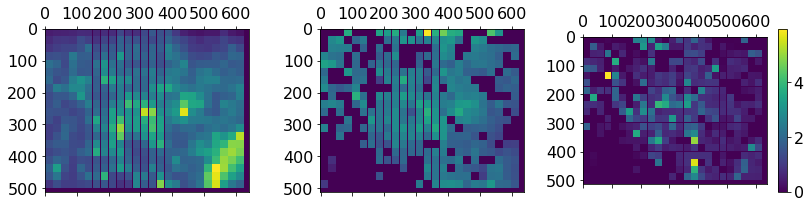

In [95]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
cmap = 'viridis'
ax1.matshow(mean_mask,cmap=cmap)
ax2.matshow(df_mask,cmap=cmap)
cmr=ax3.matshow(tau_mask,cmap=cmap)
plt.colorbar(cmr)

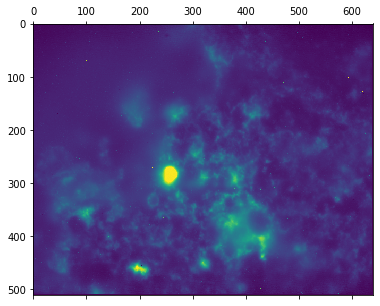

In [263]:
fig, ax1 = plt.subplots()
ax1.matshow(image_data)

In [304]:
#Cluster regions of amplitude and tau
from sklearn.cluster import KMeans

tau_values = roi_data['tau'].dropna()

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
cluster_label = kmeans.fit_predict(tau_values.values.reshape(-1,1))
print(np.shape(cluster_label))

(323,)


In [280]:
x = np.arange(1,np.shape(mask)[1],1)
y = np.arange(1,np.shape(mask)[0],1)
connectivity = sklearn.feature_extraction.image.grid_to_graph(tau_mask)

NameError: name 'sklearn' is not defined

# DHBE Data

## 2019-06-05 Mouse (DLS)

In [13]:
#Load data
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2019-06-05/-DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_neg = roi_data.dropna()
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2019-06-05/+DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_pos = roi_data.dropna()


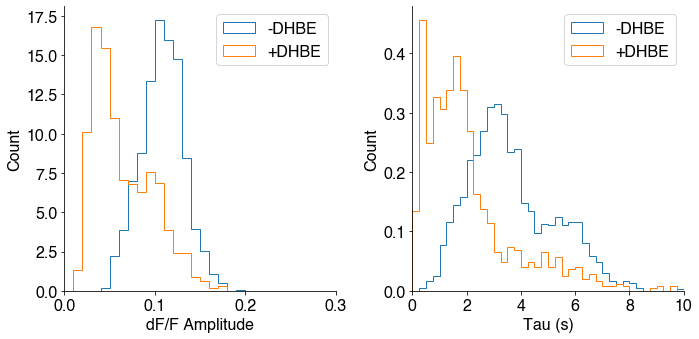

In [14]:
#Plot amplitude and tau plots
labels = ['-DHBE','+DHBE']
ax1,ax2=plot_amp_tau_hist(roi_data_neg,roi_data_pos,labels)

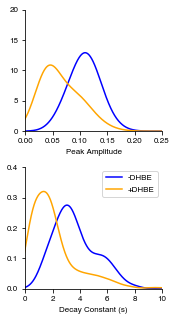

In [207]:
ax1,ax2=calc_ker_dens(roi_data_neg,roi_data_pos,labels)
ax1.get_legend().remove()
ax1.set_xlim([0,.25])
ax1.set_ylim([0,20])
ax2.set_ylim([0,.4])
plt.tight_layout()
#plt.savefig('dhbe_histograms.pdf',transparent=True,bbox_inches="tight")


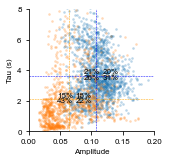

In [223]:
# Plot Tau vs Amplitude 
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (2.25, 2.25)  # (w, h)
fig, (ax1) = plt.subplots()
#+DHBE
x = roi_data_neg['Amplitude']
y = roi_data_neg['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')

#-DHBE   
x = roi_data_pos['Amplitude']
y = roi_data_pos['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')
    
ax1.set_xlim([0, .2])
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_xlim([0, .2])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])
plt.savefig('dhbe_tau_amp.pdf',transparent=True,bbox_inches="tight")

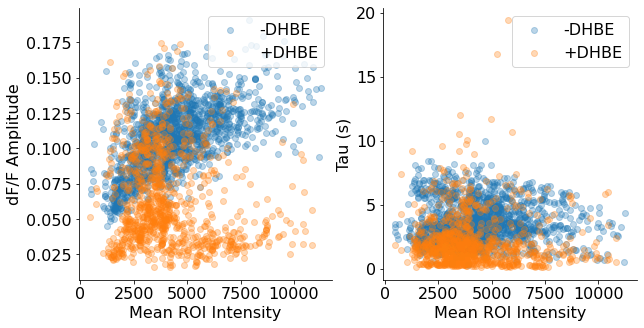

In [6]:
ax1,ax2=plot_int_corr(roi_data_neg,roi_data_pos,labels)

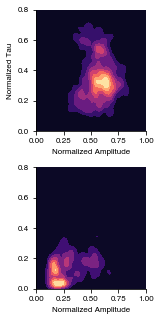

In [238]:
ax1,ax2,ax3=plot_kde2d_amp_tau(roi_data_neg,roi_data_pos,labels)
ax2.set_xlim([0,1])
ax2.set_ylim([0,.8])
ax3.set_xlim([0,1])
ax3.set_ylim([0,.8])
plt.savefig('dhbe_tau_amp_kde_map.pdf',transparent=True,bbox_inches="tight")

<Figure size 162x324 with 0 Axes>

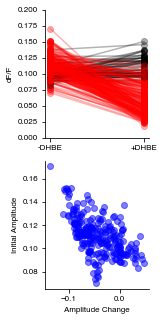

In [234]:
# Need to find ROIs that are significant for all three stim trials

# Go through -DHBE data
# Make array of mean amplitudes for each ROI -DHBE
pre_active_roi = np.zeros(500)
pre_amps = np.array(0)
for roi_num in np.arange(0,500)+1:
    if np.count_nonzero(roi_data_neg['roi_num']==roi_num)==3:
        pre_active_roi[roi_num-1]=True
        pre_amps = np.append(pre_amps,np.mean(roi_data_neg['Amplitude'][roi_data_neg['roi_num']==roi_num]))
        
# Go through +DHBE data
# Make array of mean amplitudes for each ROI -DHBE
post_active_roi = np.zeros(500)
post_amps = np.array(0)
for roi_num in np.arange(1,500)+1:
    if np.count_nonzero(roi_data_pos['roi_num']==roi_num)==3:
        post_active_roi[roi_num-1]=True
        post_amps = np.append(post_amps, np.mean(roi_data_pos['Amplitude'][roi_data_pos['roi_num']==roi_num]))
# Find ROIs active for both pre and post
final_rois_index = np.logical_and(pre_active_roi,post_active_roi)

num_rois = np.arange(0,500)+1
final_rois = num_rois[final_rois_index]

plt.rcParams["figure.figsize"] = (2.25, 4.5) # (w, h)
plt.rcParams.update({'font.size': 8})
plt.tight_layout()

change_df = np.array(0)
fig, (ax1,ax2) = plt.subplots(2,1)
for i in final_rois:
    x = [1,2]
    index_neg = (roi_data_neg['roi_num']==i)
    index_pos = (roi_data_pos['roi_num']==i)
    y = [np.mean(roi_data_neg['Amplitude'][index_neg]),np.mean(roi_data_pos['Amplitude'][index_pos])]
    change_df = np.append(change_df,[y[1]-y[0]])
    if change_df[-1] > 0:
        ax1.plot(x,y,'k-',alpha=0.3)
        ax1.plot(x,y,'ko',alpha=0.3)
    else:
        ax1.plot(x,y,'r-',alpha=0.3)
        ax1.plot(x,y,'ro',alpha=0.3)
    ax2.plot(change_df[-1],y[0],'ko',alpha=0.5,c='blue')
    ax2.set_xlabel('Amplitude Change')
    ax2.set_ylabel('Initial Amplitude')
ax1.set_ylim([0,.2])
ax1.set_ylabel('dF/F')
ax1.set_xticks([1,2])
ax1.set_xticklabels(['-DHBE','+DHBE'])
plt.tight_layout()
plt.savefig('dhbe_roi_change.pdf',transparent=True,bbox_inches="tight")

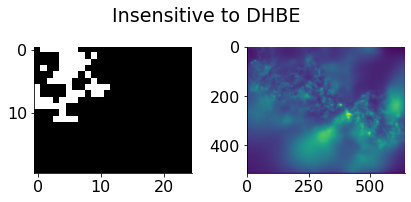

In [24]:
# Identify which of the ROIs undergo significant change
high_change_index = np.abs(change_df) < .02

# Draw a grid of ROIs (w=25,h=20) to match the ROI grid from the image processing
roi_mask = np.zeros([20,25])
index = 1
for j in np.arange(0,25):
    for i in np.arange(0,20):
        if index in final_rois[high_change_index[1:]]: # Ignore first index which was seeded with 0
            roi_mask[i,j] = 1
        index += 1
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(roi_mask,cmap='gray')
from matplotlib import image
image_data = image.imread('/Volumes/2TBSeagate_Travis/DATA/NIR microscopy/WT NIRCAT Imaging for Spatial Mapping/2019-06-05 DHBE DLS/Slice02-Loc2-DLS-Train-Stim3_2_MMStack_Pos0.ome.tif')
ax2.imshow(image_data)
fig.suptitle('Insensitive to DHBE')
plt.tight_layout()

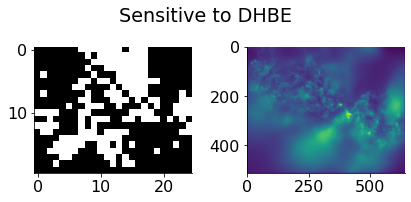

In [25]:
# Identify which of the ROIs undergo significant change
high_change_index = change_df < -.02

# Draw a grid of ROIs (w=25,h=20) to match the ROI grid from the image processing
roi_mask = np.zeros([20,25])
index = 1
for j in np.arange(0,25):
    for i in np.arange(0,20):
        if index in final_rois[high_change_index[1:]]: # Ignore first index which was seeded with 0
            roi_mask[i,j] = 1
        index += 1
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(roi_mask,cmap='gray')
from matplotlib import image
image_data = image.imread('/Volumes/2TBSeagate_Travis/DATA/NIR microscopy/WT NIRCAT Imaging for Spatial Mapping/2019-06-05 DHBE DLS/Slice02-Loc2-DLS-Train-Stim3_2_MMStack_Pos0.ome.tif')
ax2.imshow(image_data)
fig.suptitle('Sensitive to DHBE')
plt.tight_layout()

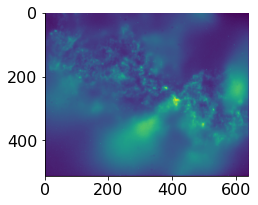

In [214]:
from matplotlib import image
image_data = image.imread('/Volumes/2TBSeagate_Travis/DATA/NIR microscopy/WT NIRCAT Imaging for Spatial Mapping/2019-06-05 DHBE DLS/Slice02-Loc2-DLS-Train-Stim3_2_MMStack_Pos0.ome.tif')
plt.imshow(image_data)

## 2020/10/19 Mouse (NAc)

In [193]:
#Load data
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-19/-DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_neg = roi_data.dropna()
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-19/+DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_pos = roi_data.dropna()

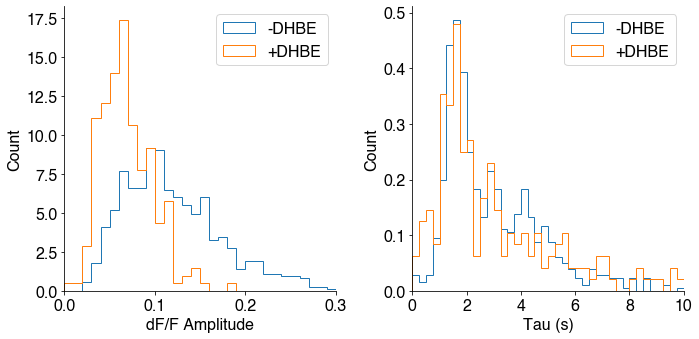

In [194]:
#Plot amplitude and tau plots
labels = ['-DHBE','+DHBE']
ax1,ax2=plot_amp_tau_hist(roi_data_neg,roi_data_pos,labels)

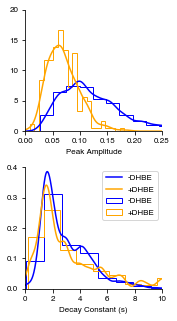

In [10]:
ax1,ax2=calc_ker_dens(roi_data_neg,roi_data_pos,labels)
ax1.get_legend().remove()
ax1.set_xlim([0,.25])
ax1.set_ylim([0,20])
ax2.set_ylim([0,.4])
plt.tight_layout()

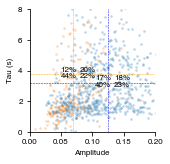

In [11]:
# Plot Tau vs Amplitude 
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (2.25, 2.25)  # (w, h)
fig, (ax1) = plt.subplots()
#+DHBE
x = roi_data_neg['Amplitude']
y = roi_data_neg['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')

#-DHBE   
x = roi_data_pos['Amplitude']
y = roi_data_pos['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')
    
ax1.set_xlim([0, .2])
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_xlim([0, .2])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])


(0.0, 0.2)

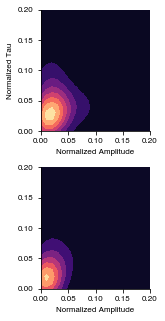

In [29]:
ax1,ax2,ax3=plot_kde2d_amp_tau(roi_data_neg,roi_data_pos,labels)
ax2.set_xlim([0,.2])
ax2.set_ylim([0,.2])
ax3.set_xlim([0,.2])
ax3.set_ylim([0,.2])


<Figure size 162x324 with 0 Axes>

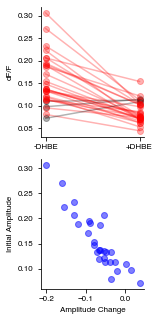

In [48]:
# Need to find ROIs that are significant for all three stim trials

# Go through -DHBE data
# Make array of mean amplitudes for each ROI -DHBE
pre_active_roi = np.zeros(500)
pre_amps = np.array(0)
for roi_num in np.arange(0,500)+1:
    if np.count_nonzero(roi_data_neg['roi_num']==roi_num)>1:
        pre_active_roi[roi_num-1]=True
        pre_amps = np.append(pre_amps,np.mean(roi_data_neg['Amplitude'][roi_data_neg['roi_num']==roi_num]))
        
# Go through +DHBE data
# Make array of mean amplitudes for each ROI -DHBE
post_active_roi = np.zeros(500)
post_amps = np.array(0)
for roi_num in np.arange(1,500)+1:
    if np.count_nonzero(roi_data_pos['roi_num']==roi_num)>1:
        post_active_roi[roi_num-1]=True
        post_amps = np.append(post_amps, np.mean(roi_data_pos['Amplitude'][roi_data_pos['roi_num']==roi_num]))
# Find ROIs active for both pre and post
final_rois_index = np.logical_and(pre_active_roi,post_active_roi)

num_rois = np.arange(0,500)+1
final_rois = num_rois[final_rois_index]

plt.rcParams["figure.figsize"] = (2.25, 4.5) # (w, h)
plt.rcParams.update({'font.size': 8})
plt.tight_layout()

change_df = np.array(0)
fig, (ax1,ax2) = plt.subplots(2,1)
for i in final_rois:
    x = [1,2]
    index_neg = (roi_data_neg['roi_num']==i)
    index_pos = (roi_data_pos['roi_num']==i)
    y = [np.mean(roi_data_neg['Amplitude'][index_neg]),np.mean(roi_data_pos['Amplitude'][index_pos])]
    change_df = np.append(change_df,[y[1]-y[0]])
    if change_df[-1] > 0:
        ax1.plot(x,y,'k-',alpha=0.3)
        ax1.plot(x,y,'ko',alpha=0.3)
    else:
        ax1.plot(x,y,'r-',alpha=0.3)
        ax1.plot(x,y,'ro',alpha=0.3)
    ax2.plot(change_df[-1],y[0],'ko',alpha=0.5,c='blue')
    ax2.set_xlabel('Amplitude Change')
    ax2.set_ylabel('Initial Amplitude')
#ax1.set_ylim([0,.2])
ax1.set_ylabel('dF/F')
ax1.set_xticks([1,2])
ax1.set_xticklabels(['-DHBE','+DHBE'])
plt.tight_layout()


## 2020/10/21 Mouse (DLS)

In [195]:
#Load data
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-21/-DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_neg = roi_data.dropna()
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-21/+DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_pos = roi_data.dropna()

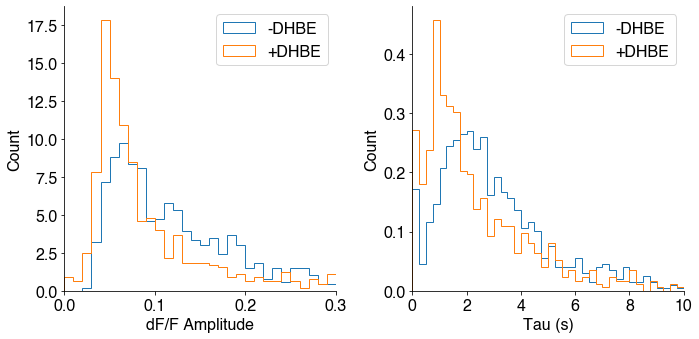

In [196]:
#Plot amplitude and tau plots
labels = ['-DHBE','+DHBE']
ax1,ax2=plot_amp_tau_hist(roi_data_neg,roi_data_pos,labels)

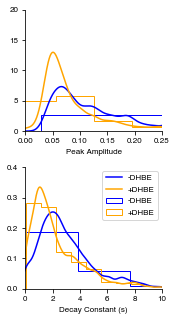

In [20]:
ax1,ax2=calc_ker_dens(roi_data_neg,roi_data_pos,labels)
ax1.get_legend().remove()
ax1.set_xlim([0,.25])
ax1.set_ylim([0,20])
ax2.set_ylim([0,.4])
plt.tight_layout()

In [26]:
from scipy import stats

pos_data = roi_data_pos['Amplitude'][roi_data_pos['Amplitude']<0.3].values
neg_data = roi_data_neg['Amplitude'][roi_data_neg['Amplitude']<0.3].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Amplitude p-value: '+str(p))
pos_data = roi_data_pos['Tau'][roi_data_pos['Tau']<10].values
neg_data = roi_data_neg['Tau'][roi_data_neg['Tau']<10].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Tau p-value: '+str(p))

Amplitude p-value: 2.48639541127423e-22
Tau p-value: 6.661338147750939e-16


(0.0, 8.0)

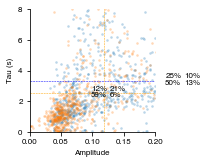

In [22]:
# Plot Tau vs Amplitude 
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (2.25, 2.25)  # (w, h)
fig, (ax1) = plt.subplots()
#+DHBE
x = roi_data_neg['Amplitude']
y = roi_data_neg['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')

#-DHBE   
x = roi_data_pos['Amplitude']
y = roi_data_pos['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')
    
ax1.set_xlim([0, .2])
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_xlim([0, .2])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])


(0.0, 0.2)

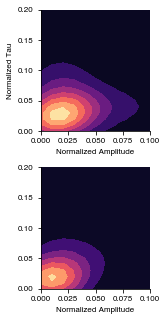

In [33]:
ax1,ax2,ax3=plot_kde2d_amp_tau(roi_data_neg,roi_data_pos,labels)
ax2.set_xlim([0,.1])
ax2.set_ylim([0,.2])
ax3.set_xlim([0,.1])
ax3.set_ylim([0,.2])


<Figure size 162x324 with 0 Axes>

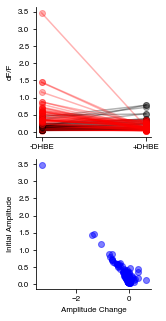

In [50]:
# Need to find ROIs that are significant for all three stim trials

# Go through -DHBE data
# Make array of mean amplitudes for each ROI -DHBE
pre_active_roi = np.zeros(500)
pre_amps = np.array(0)
for roi_num in np.arange(0,500)+1:
    if np.count_nonzero(roi_data_neg['roi_num']==roi_num)>1:
        pre_active_roi[roi_num-1]=True
        pre_amps = np.append(pre_amps,np.mean(roi_data_neg['Amplitude'][roi_data_neg['roi_num']==roi_num]))
        
# Go through +DHBE data
# Make array of mean amplitudes for each ROI -DHBE
post_active_roi = np.zeros(500)
post_amps = np.array(0)
for roi_num in np.arange(1,500)+1:
    if np.count_nonzero(roi_data_pos['roi_num']==roi_num)>1:
        post_active_roi[roi_num-1]=True
        post_amps = np.append(post_amps, np.mean(roi_data_pos['Amplitude'][roi_data_pos['roi_num']==roi_num]))
# Find ROIs active for both pre and post
final_rois_index = np.logical_and(pre_active_roi,post_active_roi)

num_rois = np.arange(0,500)+1
final_rois = num_rois[final_rois_index]

plt.rcParams["figure.figsize"] = (2.25, 4.5) # (w, h)
plt.rcParams.update({'font.size': 8})
plt.tight_layout()

change_df = np.array(0)
fig, (ax1,ax2) = plt.subplots(2,1)
for i in final_rois:
    x = [1,2]
    index_neg = (roi_data_neg['roi_num']==i)
    index_pos = (roi_data_pos['roi_num']==i)
    y = [np.mean(roi_data_neg['Amplitude'][index_neg]),np.mean(roi_data_pos['Amplitude'][index_pos])]
    change_df = np.append(change_df,[y[1]-y[0]])
    if change_df[-1] > 0:
        ax1.plot(x,y,'k-',alpha=0.3)
        ax1.plot(x,y,'ko',alpha=0.3)
    else:
        ax1.plot(x,y,'r-',alpha=0.3)
        ax1.plot(x,y,'ro',alpha=0.3)
    ax2.plot(change_df[-1],y[0],'ko',alpha=0.5,c='blue')
    ax2.set_xlabel('Amplitude Change')
    ax2.set_ylabel('Initial Amplitude')
#ax1.set_ylim([0,.2])
ax1.set_ylabel('dF/F')
ax1.set_xticks([1,2])
ax1.set_xticklabels(['-DHBE','+DHBE'])
plt.tight_layout()


## 10/22/2020 NAc measurements

In [197]:
#Load data
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-22/-DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_neg = roi_data.dropna()
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/DHBE/2020-10-22/+DHBE/ROI_data.csv'
roi_data = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])
roi_data_pos = roi_data.dropna()

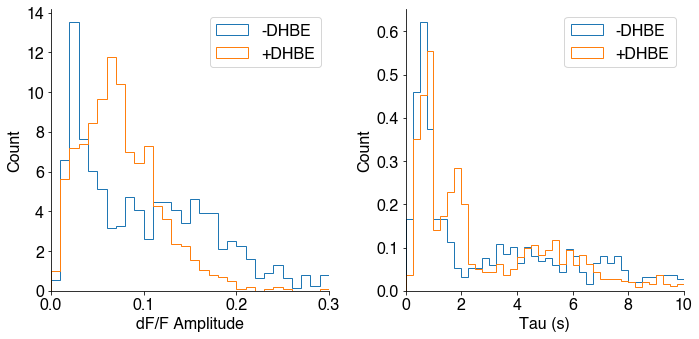

In [198]:
#Plot amplitude and tau plots
labels = ['-DHBE','+DHBE']
ax1,ax2=plot_amp_tau_hist(roi_data_neg,roi_data_pos,labels)

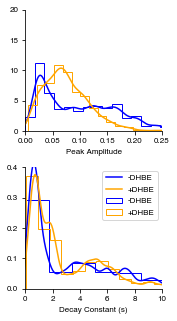

In [199]:
ax1,ax2=calc_ker_dens(roi_data_neg,roi_data_pos,labels)
ax1.get_legend().remove()
ax1.set_xlim([0,.25])
ax1.set_ylim([0,20])
ax2.set_ylim([0,.4])
plt.tight_layout()

In [27]:
from scipy import stats

pos_data = roi_data_pos['Amplitude'][roi_data_pos['Amplitude']<0.3].values
neg_data = roi_data_neg['Amplitude'][roi_data_neg['Amplitude']<0.3].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Amplitude p-value: '+str(p))
pos_data = roi_data_pos['Tau'][roi_data_pos['Tau']<10].values
neg_data = roi_data_neg['Tau'][roi_data_neg['Tau']<10].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Tau p-value: '+str(p))

Amplitude p-value: 2.48639541127423e-22
Tau p-value: 6.661338147750939e-16


(0.0, 8.0)

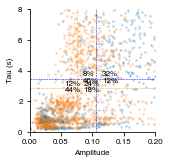

In [8]:
# Plot Tau vs Amplitude 
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (2.25, 2.25)  # (w, h)
fig, (ax1) = plt.subplots()
#-DHBE
x = roi_data_neg['Amplitude']
y = roi_data_neg['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='blue',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')

#+DHBE   
x = roi_data_pos['Amplitude']
y = roi_data_pos['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)

ax1.scatter(x, y,alpha=0.2,s=3) #, c=color, alpha=1,s=2,cmap='Accent')
ax1.axvline(mean_amp,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.axhline(mean_tau,0,1,c='orange',ls='dashed',linewidth=0.5)
ax1.text((mean_amp)-.02,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
ax1.text(mean_amp+.01,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
ax1.text(mean_amp-.02,mean_tau-.25,"{}%".format(str(int(lower_left*100))))
ax1.text(mean_amp+.01,mean_tau-.25,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')
    
ax1.set_xlim([0, .2])
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_xlim([0, .2])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])


(0.0, 0.2)

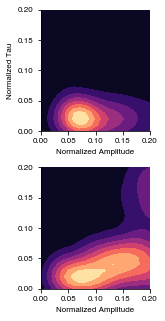

In [9]:
ax1,ax2,ax3=plot_kde2d_amp_tau(roi_data_neg,roi_data_pos,labels)
ax2.set_xlim([0,.2])
ax2.set_ylim([0,.2])
ax3.set_xlim([0,.2])
ax3.set_ylim([0,.2])


<Figure size 162x324 with 0 Axes>

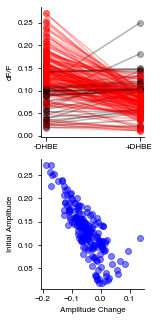

In [10]:
# Need to find ROIs that are significant for all three stim trials

# Go through -DHBE data
# Make array of mean amplitudes for each ROI -DHBE
pre_active_roi = np.zeros(500)
pre_amps = np.array(0)
for roi_num in np.arange(0,500)+1:
    if np.count_nonzero(roi_data_neg['roi_num']==roi_num)>1:
        pre_active_roi[roi_num-1]=True
        pre_amps = np.append(pre_amps,np.mean(roi_data_neg['Amplitude'][roi_data_neg['roi_num']==roi_num]))
        
# Go through +DHBE data
# Make array of mean amplitudes for each ROI -DHBE
post_active_roi = np.zeros(500)
post_amps = np.array(0)
for roi_num in np.arange(1,500)+1:
    if np.count_nonzero(roi_data_pos['roi_num']==roi_num)>1:
        post_active_roi[roi_num-1]=True
        post_amps = np.append(post_amps, np.mean(roi_data_pos['Amplitude'][roi_data_pos['roi_num']==roi_num]))
# Find ROIs active for both pre and post
final_rois_index = np.logical_and(pre_active_roi,post_active_roi)

num_rois = np.arange(0,500)+1
final_rois = num_rois[final_rois_index]

plt.rcParams["figure.figsize"] = (2.25, 4.5) # (w, h)
plt.rcParams.update({'font.size': 8})
plt.tight_layout()

change_df = np.array(0)
fig, (ax1,ax2) = plt.subplots(2,1)
for i in final_rois:
    x = [1,2]
    index_neg = (roi_data_neg['roi_num']==i)
    index_pos = (roi_data_pos['roi_num']==i)
    y = [np.mean(roi_data_neg['Amplitude'][index_neg]),np.mean(roi_data_pos['Amplitude'][index_pos])]
    change_df = np.append(change_df,[y[1]-y[0]])
    if change_df[-1] > 0:
        ax1.plot(x,y,'k-',alpha=0.3)
        ax1.plot(x,y,'ko',alpha=0.3)
    else:
        ax1.plot(x,y,'r-',alpha=0.3)
        ax1.plot(x,y,'ro',alpha=0.3)
    ax2.plot(change_df[-1],y[0],'ko',alpha=0.5,c='blue')
    ax2.set_xlabel('Amplitude Change')
    ax2.set_ylabel('Initial Amplitude')
#ax1.set_ylim([0,.2])
ax1.set_ylabel('dF/F')
ax1.set_xticks([1,2])
ax1.set_xticklabels(['-DHBE','+DHBE'])
plt.tight_layout()


## Pooled Data

In [ ]:
mouse_folders = os.listdir('./Data/WT/')
mouse_folders.remove('.DS_Store')
mouse_folders.remove('2019-11-20') #Data was taken at 24C instead of 32C
for i in np.arange(0,len(mouse_folders),1):
    path = './Data/WT/'+mouse_folders[i]
    roi_data_file_ds = path+'/ROI_data-ds.csv'
    roi_data_file_nac = path+'/ROI_data-NAc.csv'
    roi_data_ds = pd.read_csv(roi_data_file_ds,index_col=None, na_values=['NA'])
    roi_data_nac = pd.read_csv(roi_data_file_nac,index_col=None, na_values=['NA'])
    if i == 0:
        roi_data_all = pd.DataFrame()
        roi_data_ds['Region'] = 'dSTR'
        roi_data_nac['Region'] = 'cNAc'
        roi_data = pd.concat([roi_data_ds,roi_data_nac])
        roi_data['Date'] = mouse_folders[i]
        roi_data['MouseID'] = i+1
        roi_data_all = roi_data.dropna()
    else:
        roi_data_ds['Region'] = 'dSTR'
        roi_data_nac['Region'] = 'cNAc'
        roi_data = pd.concat([roi_data_ds,roi_data_nac])
        roi_data['Date'] = mouse_folders[i]
        roi_data['MouseID'] = i+1
        test = roi_data.dropna()
        roi_data_all = pd.concat([roi_data_all,test])
roi_data_all.reset_index();

---

# Compare number of active ROIs relative to labeling density in DS vs NAc

In [31]:
#Load data without removing NaNs, allowing us to look at "non-active" regions
roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/WT/2019-10-20/ROI_data-DS.csv'
roi_data_ds = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])

roi_data_file = '~/Google Drive/NIRCAT Spatial Analysis Project/Data/WT/2019-10-20/ROI_data-NAc.csv'
roi_data_nac = pd.read_csv(roi_data_file,index_col=None, na_values=['NA'])


## Make a histogram of F0 for active and non-active sites to see whether non-active areas are predominantly dark

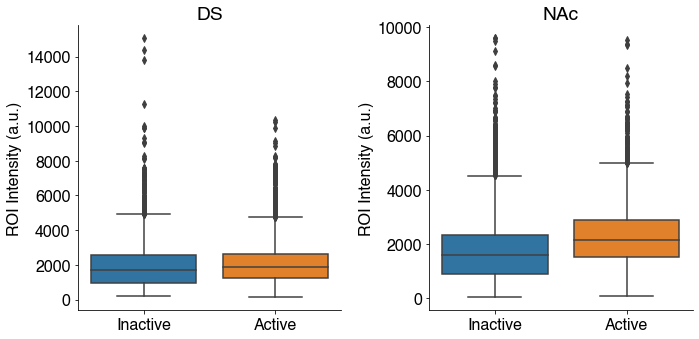

In [18]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10, 5) # (w, h)

#For DS
fig, (ax1, ax2) = plt.subplots(1,2)
#Find indices for significant ROIs
index_sig = roi_data_ds['Significance']>0
index_nonsig = roi_data_ds['Significance']<1
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
labels = ['Active: '+str(num_active),'Inactive: '+str(num_inactive)]
data = {'mean_intensity':roi_data_ds['Mean_Intensity'].values,'class':index_sig.values}
df = pd.DataFrame(data=data)
#ax1.hist(roi_data_ds['Mean_Intensity'][index_sig],density=True,bins=20,histtype='step',label=labels[0],color='b')
#ax1.hist(roi_data_ds['Mean_Intensity'][index_nonsig],density=True,bins=20,histtype='step',label=labels[1],color='orange')
sns.boxplot(ax=ax1,x='class',y='mean_intensity',data=df)
ax1.set(xlabel='',ylabel='ROI Intensity (a.u.)')
ax1.set_xticklabels(['Inactive','Active'])



#ax1.set_xlabel('ROI Intensity (a.u.)')
ax1.set_title('DS')
#For NAc
index_sig = roi_data_nac['Significance']>0
index_nonsig = roi_data_nac['Significance']<1
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
labels = ['Active: '+str(num_active),'Inactive: '+str(num_inactive)]
data = {'mean_intensity':roi_data_nac['Mean_Intensity'].values,'class':index_sig.values}
df = pd.DataFrame(data=data)
sns.boxplot(ax=ax2,x='class',y='mean_intensity',data=df)
ax2.set(xlabel='',ylabel='ROI Intensity (a.u.)')
ax2.set_xticklabels(['Inactive','Active'])


#ax2.set_xlabel('ROI Intensity (a.u.)')
ax2.set_title('NAc')
plt.tight_layout()

export_plot_pdf('intensity_histograms.pdf')


DS: MW p=5.640697575718221e-24
Effect Size: 0.448812
NAc: MW p=6.479280536997557e-119
Effect Size: 0.370024


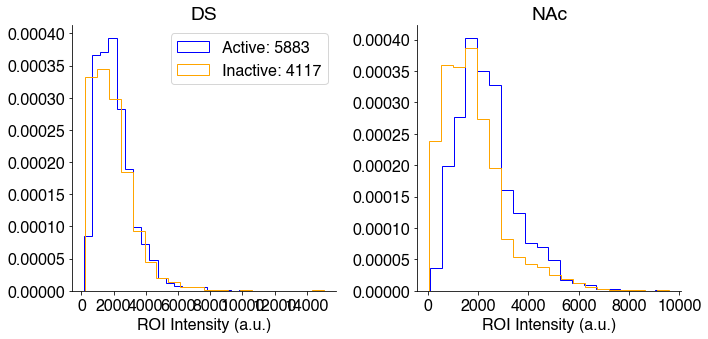

In [38]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10, 5) # (w, h)

#For DS
fig, (ax1, ax2) = plt.subplots(1,2)
#Find indices for significant ROIs
index_sig = roi_data_ds['Significance']>0
index_nonsig = roi_data_ds['Significance']<1
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
labels = ['Active: '+str(num_active),'Inactive: '+str(num_inactive)]
data = {'mean_intensity':roi_data_ds['Mean_Intensity'].values,'class':index_sig.values}
df = pd.DataFrame(data=data)
ax1.hist(roi_data_ds['Mean_Intensity'][index_sig],density=True,bins=20,histtype='step',label=labels[0],color='b')
ax1.hist(roi_data_ds['Mean_Intensity'][index_nonsig],density=True,bins=20,histtype='step',label=labels[1],color='orange')
#sns.boxplot(ax=ax1,x='class',y='mean_intensity',data=df)
ax1.set(xlabel='ROI Intensity (a.u.)',ylabel='')
#ax1.set_xticklabels(['Inactive','Active'])
#ax1.set_xlabel('ROI Intensity (a.u.)')
ax1.set_title('DS')
ax1.legend()
plt.tight_layout()
(d,p)=stats.mannwhitneyu(roi_data_ds['Mean_Intensity'][index_sig].values,roi_data_ds['Mean_Intensity'][index_nonsig].values)
print('DS: MW p='+str(p))

data1 = np.random.choice(roi_data_ds['Mean_Intensity'][index_sig].values,500)
data2 = np.random.choice(roi_data_ds['Mean_Intensity'][index_nonsig].values,500)
(d,p)=stats.mannwhitneyu(data1,data2)
effect_size = d/(500*500)
print('Effect Size: '+ str(effect_size))

#For NAc
index_sig = roi_data_nac['Significance']>0
index_nonsig = roi_data_nac['Significance']<1
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
labels = ['Active: '+str(num_active),'Inactive: '+str(num_inactive)]
data = {'mean_intensity':roi_data_nac['Mean_Intensity'].values,'class':index_sig.values}
df = pd.DataFrame(data=data)
ax2.hist(roi_data_nac['Mean_Intensity'][index_sig],density=True,bins=20,histtype='step',label=labels[0],color='b')
ax2.hist(roi_data_nac['Mean_Intensity'][index_nonsig],density=True,bins=20,histtype='step',label=labels[1],color='orange')
#sns.boxplot(ax=ax2,x='class',y='mean_intensity',data=df)
ax2.set(xlabel='ROI Intensity (a.u.)',ylabel='')
#ax2.set_xticklabels(['Inactive','Active'])


#ax2.set_xlabel('ROI Intensity (a.u.)')
ax2.set_title('NAc')
plt.tight_layout()

(d,p)=stats.mannwhitneyu(roi_data_nac['Mean_Intensity'][index_sig].values,roi_data_nac['Mean_Intensity'][index_nonsig].values)
print('NAc: MW p='+str(p))

data1 = np.random.choice(roi_data_nac['Mean_Intensity'][index_sig].values,500)
data2 = np.random.choice(roi_data_nac['Mean_Intensity'][index_nonsig].values,500)
(d,p)=stats.mannwhitneyu(data1,data2)
effect_size = d/(500*500)
print('Effect Size: '+ str(effect_size))

export_plot_pdf('intensity_histograms.pdf')

In [139]:
pooled_data = np.append(pos_data,neg_data)
data = pd.DataFrame({'pos':pos_data,'neg':neg_data})
mean_diff_pool = np.array([])
import random
for i in np.arange(1,500):
    random.shuffle(pooled_data)
    sample1 = pooled_data[0:5882]
    sample2 = pooled_data[5883:]
    mean_diff = np.mean(sample1)-np.mean(sample2)
    mean_diff_pool = np.append(mean_diff_pool,mean_diff)
plt.hist(mean_diff_pool)
np.mean(pos_data)-np.mean(neg_data)

ValueError: arrays must all be same length

In [138]:
sns.catplot(x={1,2},y={pos_data,neg_data})

TypeError: unhashable type: 'numpy.ndarray'

3.952791361032974e-06

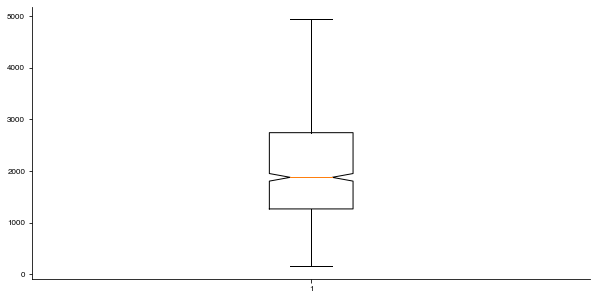

In [95]:
mean1=np.mean(data1)
mean2=np.mean(data2)
std1 = np.std(data1)
std2 = np.std(data2)
import random as rd
test1 = rd.sample(list(data1.values),1000)
test2 = rd.sample(list(data2.values),1000)
plt.boxplot(test1,test2,showfliers=False)
#(d,p)=stats.ttest_ind(pos_data,neg_data,equal_var=False)
(d,p)=stats.mannwhitneyu(test1,test2)


In [17]:
from scipy import stats

pos_data = roi_data_pos['Amplitude'].values
neg_data = roi_data_neg['Amplitude'].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Amplitude p-value: '+str(p))
pos_data = roi_data_pos['Tau'].values
neg_data = roi_data_neg['Tau'].values
[d,p]=stats.kstest(pos_data,neg_data)
print('Tau p-value: '+str(p))

Amplitude p-value: 6.661338147750939e-16
Tau p-value: 0.00014503983275315768


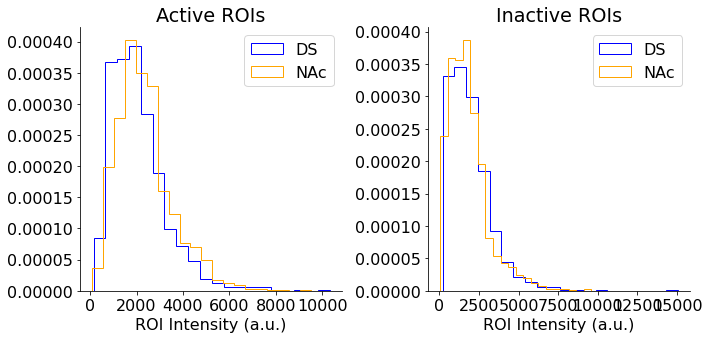

In [355]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10, 5) # (w, h)

#For DS
labels = ['DS','NAc']
fig, (ax1, ax2) = plt.subplots(1,2)
#Find indices for significant ROIs
index_sig_ds = roi_data_ds['Significance']>0
index_sig_nac = roi_data_nac['Significance']>0
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
ax1.hist(roi_data_ds['Mean_Intensity'][index_sig_ds],density=True,bins=20,histtype='step',label=labels[0],color='b')
ax1.hist(roi_data_nac['Mean_Intensity'][index_sig_nac],density=True,bins=20,histtype='step',label=labels[1],color='orange')
ax1.legend()
ax1.set_title('Active ROIs')
ax1.set_xlabel('ROI Intensity (a.u.)')
#For NAc
labels = ['DS','NAc']
index_nonsig_ds = roi_data_ds['Significance']<1
index_nonsig_nac = roi_data_nac['Significance']<1
num_active = np.count_nonzero(index_sig)
num_inactive = np.count_nonzero(index_nonsig)
ax2.hist(roi_data_ds['Mean_Intensity'][index_nonsig_ds],density=True,bins=20,histtype='step',label=labels[0],color='b')
ax2.hist(roi_data_nac['Mean_Intensity'][index_nonsig_nac],density=True,bins=20,histtype='step',label=labels[1],color='orange')
ax2.set_title('Inactive ROIs')
ax2.legend()
ax2.set_xlabel('ROI Intensity (a.u.)')
plt.tight_layout()
export_plot_pdf('roi_intensity_activity.pdf')

In [28]:
np.shape(index_nonsig.values)

(8000,)

# Pooled ROI data for all animals

## Collect and collate data for all animals

In [2]:
#Cycle through mouse folders and add each to a DataFrame.
# Add feature for 'Date', 'Animal ID', and 'Region' (DS, NAc)
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
mouse_folders = os.listdir('./Data/WT/')
mouse_folders.remove('.DS_Store')
mouse_folders.remove('2019-11-20') #Data was taken at 24C instead of 32C
for i in np.arange(0,len(mouse_folders),1):
    path = './Data/WT/'+mouse_folders[i]
    roi_data_file_ds = path+'/ROI_data-ds.csv'
    roi_data_file_nac = path+'/ROI_data-NAc.csv'
    roi_data_ds = pd.read_csv(roi_data_file_ds,index_col=None, na_values=['NA'])
    roi_data_nac = pd.read_csv(roi_data_file_nac,index_col=None, na_values=['NA'])
    if i == 0:
        roi_data_all = pd.DataFrame()
        roi_data_ds['Region'] = 'dSTR'
        roi_data_nac['Region'] = 'cNAc'
        roi_data = pd.concat([roi_data_ds,roi_data_nac])
        roi_data['Date'] = mouse_folders[i]
        roi_data['MouseID'] = i+1
        roi_data_all = roi_data.dropna()
    else:
        roi_data_ds['Region'] = 'dSTR'
        roi_data_nac['Region'] = 'cNAc'
        roi_data = pd.concat([roi_data_ds,roi_data_nac])
        roi_data['Date'] = mouse_folders[i]
        roi_data['MouseID'] = i+1
        test = roi_data.dropna()
        roi_data_all = pd.concat([roi_data_all,test])
roi_data_all.reset_index();

## View histograms of peak dF and tau for pooled mouse data

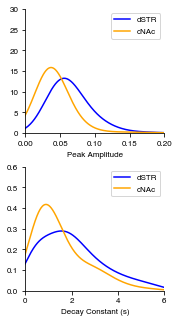

In [3]:
ds = roi_data_all[roi_data_all['Region']=='dSTR']
nac = roi_data_all[roi_data_all['Region']=='cNAc']
#Drop values of amplitude >0.2 and tau >6s so outliers don't mess up normalization
ds = ds[ds['Tau']<6]
nac = nac[nac['Tau']<6]
ds = ds[ds['Amplitude']<0.2]
nac = nac[nac['Amplitude']<0.2]

(ax1,ax2) = calc_ker_dens(ds,nac,['dSTR','cNAc'])
plt.tight_layout()
ax2.set_ylim([0,0.6])
ax1.set_ylim([0,30])
ax2.set_xlim([0,6])
ax1.set_xlim([0,0.2])
export_plot_pdf('pooled_histograms.pdf')

Original Sample Statistic: 0.4639337329787045


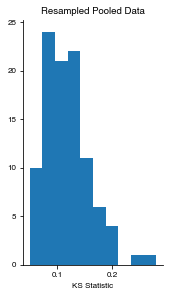

In [12]:
#Plot amplitude and tau plots
labels = ['DS','NAc']
#ax1,ax2=plot_amp_tau_hist(ds,nac,labels)
results = stats.kstest(ds['Amplitude'],nac['Amplitude'])

stat_results = np.array([])
for i in np.arange(0,100,1):
    pooled = np.append(ds['Amplitude'].values,nac['Amplitude'].values)
    sample_pool1 = np.random.choice(pooled,100)
    sample_pool2 = np.random.choice(pooled,100)
    [stat,p]=stats.kstest(sample_pool1,sample_pool2)
    stat_results = np.append(stat_results,stat)

plt.hist(stat_results)
plt.xlabel('KS Statistic')
plt.title('Resampled Pooled Data')
print('Original Sample Statistic: ' +str(results.statistic))

In [7]:
stat_results

array([0.09, 0.14, 0.15, 0.1 , 0.07, 0.09, 0.1 , 0.11, 0.11, 0.14, 0.09,
       0.09, 0.08, 0.08, 0.12, 0.14, 0.06, 0.16, 0.1 , 0.13, 0.06, 0.1 ,
       0.16, 0.19, 0.08, 0.1 , 0.15, 0.1 , 0.15, 0.08, 0.18, 0.11, 0.18,
       0.08, 0.08, 0.1 , 0.14, 0.1 , 0.09, 0.17, 0.08, 0.1 , 0.22, 0.11,
       0.16, 0.1 , 0.16, 0.13, 0.15, 0.09, 0.07, 0.13, 0.1 , 0.21, 0.09,
       0.14, 0.11, 0.07, 0.06, 0.15, 0.1 , 0.11, 0.1 , 0.11, 0.17, 0.07,
       0.11, 0.11, 0.07, 0.14, 0.06, 0.14, 0.22, 0.26, 0.11, 0.13, 0.17,
       0.19, 0.09, 0.12, 0.1 , 0.12, 0.09, 0.08, 0.11, 0.1 , 0.05, 0.09,
       0.15, 0.15, 0.12, 0.13, 0.11, 0.1 , 0.06, 0.16, 0.18, 0.08, 0.26,
       0.1 ])

In [14]:
sample_pool1

array([array([0.05134677, 0.04193365, 0.0412242 , ..., 0.06804086, 0.06954108,
       0.05128709]),
       array([0.05475965, 0.04256155, 0.05075645, ..., 0.02050657, 0.01937504,
       0.0114115 ]),
       array([0.05134677, 0.04193365, 0.0412242 , ..., 0.06804086, 0.06954108,
       0.05128709]),
       array([0.05475965, 0.04256155, 0.05075645, ..., 0.02050657, 0.01937504,
       0.0114115 ]),
       array([0.05134677, 0.04193365, 0.0412242 , ..., 0.06804086, 0.06954108,
       0.05128709]),
       array([0.05475965, 0.04256155, 0.05075645, ..., 0.02050657, 0.01937504,
       0.0114115 ]),
       array([0.05475965, 0.04256155, 0.05075645, ..., 0.02050657, 0.01937504,
       0.0114115 ]),
       array([0.05475965, 0.04256155, 0.05075645, ..., 0.02050657, 0.01937504,
       0.0114115 ]),
       array([0.05134677, 0.04193365, 0.0412242 , ..., 0.06804086, 0.06954108,
       0.05128709]),
       array([0.05134677, 0.04193365, 0.0412242 , ..., 0.06804086, 0.06954108,
       0.05128709]),


In [270]:
test = ds['Amplitude'].values
np.random.choice(test,10)

array([0.06434184, 0.06856018, 0.06006484, 0.06952413, 0.0477711 ,
       0.05323801, 0.06507683, 0.06414366, 0.11512707, 0.05355117])

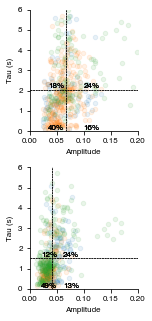

In [236]:
# Plot Tau vs Amplitude and color by mouse ID
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (2.16, 4.5)  # (w, h)
fig, (ax1, ax2) = plt.subplots(2, 1)
#DS
#data_shuffled = ds.sample(frac=1)
data_shuffled = ds.sample(n=500)
x = data_shuffled['Amplitude']
y = data_shuffled['Tau']
color = data_shuffled['MouseID']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)
for i in set(color):
    index = color==i
    ax1.scatter(x[index], y[index],alpha=0.1,s=20) #, c=color, alpha=1,s=2,cmap='Accent')
    ax1.axvline(mean_amp,0,1,c='k',ls='dashed',linewidth=0.5)
    ax1.axhline(mean_tau,0,1,c='k',ls='dashed',linewidth=0.5)
    ax1.text((mean_amp/2)*1.05,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
    ax1.text(mean_amp+mean_amp/2,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
    ax1.text(mean_amp/2,0.05,"{}%".format(str(int(lower_left*100))))
    ax1.text(mean_amp+mean_amp/2,0.05,"{}%".format(str(int(lower_right*100))))
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Tau (s)')

#NAc    
#data_shuffled = nac.sample(frac=1)
data_shuffled = nac.sample(n=500)
x = data_shuffled['Amplitude']
y = data_shuffled['Tau']
mean_amp = np.mean(x)
mean_tau = np.mean(y)
upper_left = np.count_nonzero((x<mean_amp)&(y>mean_tau)) / len(x)
upper_right = np.count_nonzero((x>mean_amp)&(y>mean_tau)) / len(x)
lower_left = np.count_nonzero((x<mean_amp)&(y<mean_tau)) / len(x)
lower_right = np.count_nonzero((x>mean_amp)&(y<mean_tau)) / len(x)
color = data_shuffled['MouseID']
for i in set(color):
    index = color==i
    ax2.scatter(x[index], y[index],alpha=0.1,s=20) #, c=color, alpha=1,s=2,cmap='Accent')
    ax2.axvline(mean_amp,0,1,c='k',ls='dashed',linewidth=0.5)
    ax2.axhline(mean_tau,0,1,c='k',ls='dashed',linewidth=0.5)
    ax2.text((mean_amp/2)*1.05,mean_tau*1.05,"{}%".format(str(int(upper_left*100))))
    ax2.text(mean_amp+mean_amp/2,mean_tau*1.05,"{}%".format(str(int(upper_right*100))))
    ax2.text(mean_amp/2,0.05,"{}%".format(str(int(lower_left*100))))
    ax2.text(mean_amp+mean_amp/2,0.05,"{}%".format(str(int(lower_right*100))))
ax2.set_xlabel('Amplitude')
ax2.set_ylabel('Tau (s)')
    
ax1.set_xlim([0, .2])
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_xlim([0, .2])
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim([0, 6])
ax2.set_ylim([0, 6])
plt.tight_layout()
#ax1.set_title('dSTR')
#ax2.set_title('cNAc')
export_plot_pdf('tau_amp_scatter.pdf')

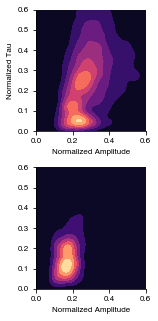

In [227]:
%matplotlib inline
labels = ['dSTR','cNAc']
ax1,ax2,ax3=plot_kde2d_amp_tau(ds,nac,labels)
export_plot_pdf('kde_map.pdf')
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

Text(0, 0.5, 'Cum. Count')

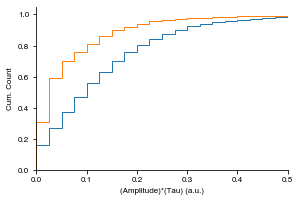

In [257]:
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (4.5, 3)  # (w, h)
ds_auc = ds['Amplitude']*ds['Tau']
nac_auc = nac['Amplitude']*nac['Tau']
plt.hist(ds_auc, bins=np.arange(0, 1 + .025, .025), density=True, cumulative=True,
             histtype='step', label=labels[0])
plt.hist(nac_auc, bins=np.arange(0, 1 + .025, .025), density=True, cumulative=True,
             histtype='step', label=labels[0])
plt.xlim([0,.5])
plt.xlabel('(Amplitude)*(Tau) (a.u.)')
plt.ylabel('Cum. Count')

Text(0, 0.5, 'Count')

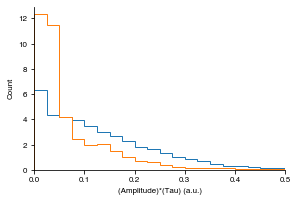

In [256]:
plt.rcParams.update({'font.size': 8})
plt.rcParams["figure.figsize"] = (4.5, 3)  # (w, h)
ds_auc = ds['Amplitude']*ds['Tau']
nac_auc = nac['Amplitude']*nac['Tau']
plt.hist(ds_auc, bins=np.arange(0, 1 + .025, .025), density=True,
             histtype='step', label=labels[0])
plt.hist(nac_auc, bins=np.arange(0, 1 + .025, .025), density=True,
             histtype='step', label=labels[0])
plt.xlim([0,.5])
plt.xlabel('(Amplitude)*(Tau) (a.u.)')
plt.ylabel('Count')

## Assign class to ROIs and generate new image

In [57]:
# Load typical label map
mask_data = pd.read_excel('Image Processing Figures/image_mask.xlsx',sheet_name='roi_mask',header=None)
roi_mask = mask_data.values

In [194]:
# Find filenames of unqiue images
fullpath = roi_data_all['Path_Name'] + roi_data_all['File_Name']
roi_data_all['full_path']=fullpath
filenames = roi_data_all['full_path'].unique()
tau_thresh = 1 # 1s threshold
amp_thresh = 0.05 # amplitude threshold

# For a single video, create mask of ROI amplitude
counter = 1
for file in filenames:
    print(str(counter)+' of '+str(len(filenames)))
    counter+=1
    video_data = roi_data_all[roi_data_all['full_path'] == file]
    file_name = video_data['File_Name'].unique()
    amplitude_mask = np.zeros_like(roi_mask)
    class_mask = np.zeros_like(roi_mask)
    image = np.zeros_like(roi_mask)
    roi_list = video_data['roi_num'].unique()
    for roi_num in roi_list:
        if video_data[video_data['roi_num'] == roi_num]['Significance'].values:
            amplitude = video_data[video_data['roi_num'] == roi_num]['Amplitude'].values
            tau = video_data[video_data['roi_num'] == roi_num]['Tau'].values
            amplitude_mask[roi_mask == roi_num] = amplitude*100
            if (tau>tau_thresh)&(amplitude>amp_thresh):
                class_mask[roi_mask == roi_num] = 2
            else:
                class_mask[roi_mask == roi_num] = 1
        image[roi_mask == roi_num] = video_data[video_data['roi_num'] == roi_num]['Mean_Intensity'].values
    plt.rcParams["figure.figsize"] = (9, 4)  # (w, h)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.imshow(image)
    ax2.imshow(amplitude_mask)
    ax3.imshow(class_mask)
    plt.savefig('/Users/travis/Google Drive/NIRCAT Spatial Analysis Project/ROI Class Analysis/'+file_name[0][:-3]+'png',dpi=300)
    plt.close()

1 of 91
2 of 91
3 of 91
4 of 91
5 of 91
6 of 91
7 of 91
8 of 91
9 of 91
10 of 91
11 of 91
12 of 91
13 of 91
14 of 91
15 of 91
16 of 91
17 of 91
18 of 91
19 of 91
20 of 91
21 of 91
22 of 91
23 of 91
24 of 91
25 of 91
26 of 91
27 of 91
28 of 91
29 of 91
30 of 91
31 of 91
32 of 91
33 of 91
34 of 91
35 of 91
36 of 91
37 of 91
38 of 91
39 of 91
40 of 91
41 of 91
42 of 91
43 of 91
44 of 91
45 of 91
46 of 91
47 of 91
48 of 91
49 of 91
50 of 91
51 of 91
52 of 91
53 of 91
54 of 91
55 of 91
56 of 91
57 of 91
58 of 91
59 of 91
60 of 91
61 of 91
62 of 91
63 of 91
64 of 91
65 of 91
66 of 91
67 of 91
68 of 91
69 of 91
70 of 91
71 of 91
72 of 91
73 of 91
74 of 91
75 of 91
76 of 91
77 of 91
78 of 91
79 of 91
80 of 91
81 of 91
82 of 91
83 of 91
84 of 91
85 of 91
86 of 91
87 of 91
88 of 91
89 of 91
90 of 91
91 of 91


In [193]:
video_data = roi_data_all[roi_data_all['full_path'] == file]
file_name = video_data['File_Name'].unique()
file_name

array(['Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.ome.tif'],
      dtype=object)

## Try gating the data to assign class
### dSTR: gate tau>0.2, amplitude>0.2 (normalized)

In [43]:
tau_gate = 0.2
tau = (ds['Tau'].values/max(ds['Tau'].values))
tau_gated = tau>tau_gate
amp_gate = 0.2
amp = (ds['Amplitude'].values/ds['Amplitude'].values)
amp_gated = amp>amp_gate
class_index = (tau_gated&amp_gated)*1 #convert to binary
ds['roi_class']=class_index

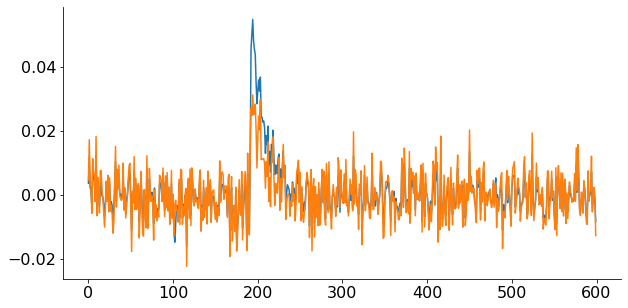

In [185]:
# With each ROI classified, try and pull dF/F traces for each
# ROI class 1
rois = ds[ds['roi_class'] == 1]
full_path = rois['Path_Name'].values + '/' + rois['File_Name'].values
rois = rois.assign(full_path=full_path)
file_list = rois['full_path'].unique()
# for file in file_list:
file = file_list[2]
file_data = rois[rois['full_path'] == file]
file_name = file[0:-3] + 'xlsx'
# Import corresponding csv with dF/F trace data
data = pd.read_excel(file_name, header=None)
roi_nums = file_data['roi_num']
df = data[:][roi_nums-1]
df.columns = np.arange(1, len(df.columns)+1)  # Renumber columns
mean_df = np.average(df.values, 1)
plt.plot(mean_df)
# ROI class 0
rois = ds[ds['roi_class'] == 0]
full_path = rois['Path_Name'].values + '/' + rois['File_Name'].values
rois = rois.assign(full_path=full_path)
file_list = rois['full_path'].unique()
# for file in file_list:
file_data = rois[rois['full_path'] == file]
file_name = file[0:-3] + 'xlsx'
# Import corresponding csv with dF/F trace data
data = pd.read_excel(file_name, header=None)
roi_nums = file_data['roi_num']
df = data[:][roi_nums-1]
df.columns = np.arange(1, len(df.columns)+1)  # Renumber columns
mean_df = np.average(df.values, 1)
plt.plot(mean_df)

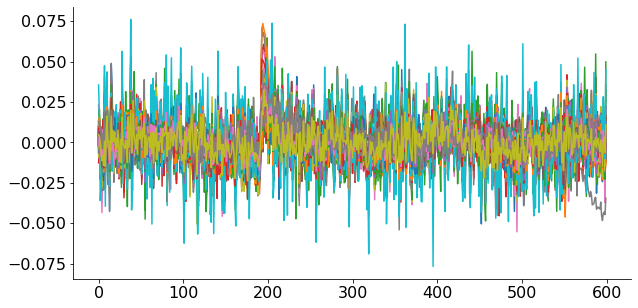

In [182]:
mean_df = np.average(df.values,axis=1)
plt.plot(df.values);

In [180]:
np.average(df.values[205,:])

0.02392843211850512

## Using pooled tau-amplitude data, assign Class to different points
### dSTR

In [20]:
from sklearn.cluster import AgglomerativeClustering
amplitude = ds['Amplitude'].values
tau = ds['Tau'].values
X = [amplitude,tau]
clustering = AgglomerativeClustering().fit(np.transpose(X))
clustering.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [164]:
np.shape(X)

(2, 22702)

<IPython.core.display.Javascript object>


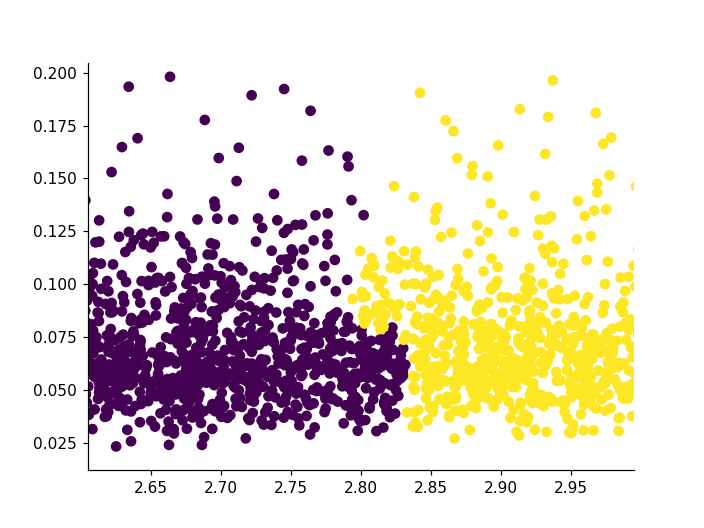

In [21]:
%matplotlib notebook
plt.scatter(tau,amplitude,c=clustering.labels_)

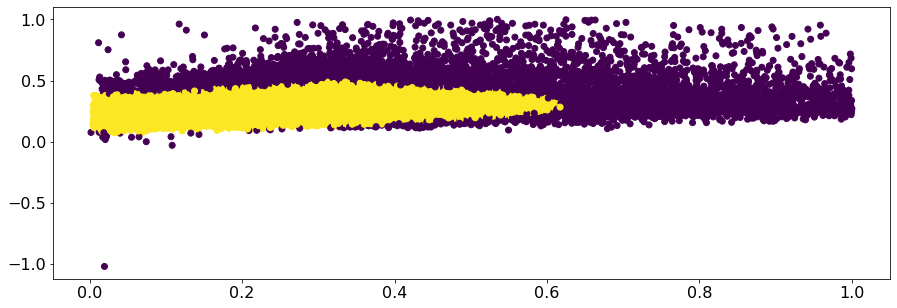

In [211]:
from sklearn.cluster import DBSCAN
amplitude = ds['Amplitude'].values
amplitude = amplitude/max(amplitude)
tau = ds['Tau']
tau = tau/max(tau)
X = [amplitude,tau]
clustering = DBSCAN(eps=0.05,min_samples=500).fit(np.transpose(X))
clustering.labels_
plt.scatter(tau,amplitude,c=clustering.labels_)

In [ ]:
from sklearn.mixture import GaussianMixture
amplitude = ds['Amplitude'].values
amplitude = amplitude/max(amplitude)
tau = ds['Tau']
tau = tau/max(tau)
X = [amplitude,tau]
n_clusters = 2
clustering = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(X)
labels = clustering.predict(X)
#plt.scatter(tau,amplitude,c=labels)

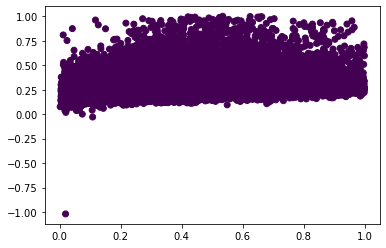

In [7]:
from sklearn.cluster import OPTICS
amplitude = ds['Amplitude'].values
amplitude = amplitude/max(amplitude)
tau = ds['Tau']
tau = tau/max(tau)
X = [amplitude,tau]
clustering = OPTICS(min_cluster_size=500).fit(np.transpose(X))
clustering.labels_
plt.scatter(tau,amplitude,c=clustering.labels_)

In [6]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
ds

,File_Name,Path_Name,roi_num,Amplitude,Mean_Intensity,Tau,Significance,Region,Date,MouseID
0,Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.o...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,1,0.051347,478.392434,0.328190,1,dSTR,2019-09-25,1
1,Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.o...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,2,0.041934,650.279423,0.595781,1,dSTR,2019-09-25,1
2,Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.o...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,3,0.041224,788.794006,0.564658,1,dSTR,2019-09-25,1
3,Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.o...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,4,0.044955,818.932109,0.753861,1,dSTR,2019-09-25,1
4,Slice02-Loc01-1ms-650uA-Stim1_1_MMStack_Pos0.o...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,5,0.034681,902.132219,0.905774,1,dSTR,2019-09-25,1
...,...,...,...,...,...,...,...,...,...,...
9991,Slice02_1ms_Loc03_000x_000y_Stim04_1_MMStack_P...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,492,0.040234,973.952175,0.941704,1,dSTR,2019-10-20,3
9992,Slice02_1ms_Loc03_000x_000y_Stim04_1_MMStack_P...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,493,0.060636,1173.917306,3.508706,1,dSTR,2019-10-20,3
9994,Slice02_1ms_Loc03_000x_000y_Stim04_1_MMStack_P...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,495,0.068041,1082.313798,4.536522,1,dSTR,2019-10-20,3
9996,Slice02_1ms_Loc03_000x_000y_Stim04_1_MMStack_P...,/Volumes/2TBSeagate_Travis/DATA/NIR microscopy...,497,0.069541,1083.122770,1.723251,1,dSTR,2019-10-20,3


# To do list:
- [ ] Compare individual ROI changes from stim to stim on population basis
- [ ] Combine all mice into single population for tau-amplitude plots
- [x] Make DHBE plots
- [x] Rewrite plotting scrips as functions for ease of use and shareability
- [ ] Plot histograms of ROI intensity for NAc and DS
- [ ] Repeat DHBE experiments in NAc shell
- [ ] Rework coordinate system from atlas
- [ ] Make map with each mouse color coded in coordinate space (need to pool all mouse data)
- [ ] Normalize between NAc and DS difference in labeling when comparing number of ROIs
- [ ] Ask Kristen is histo of CINs is possible
- [ ] GABA blocker could be cool
- [ ] Run experiment with DHBE titration

